In [1]:
import pandas as pd
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
import random
import math
from sklearn.cluster import KMeans
from mpl_toolkits.mplot3d import Axes3D
env = "Varinia"

In [2]:
if env == "Sky":
    data_path_1='../Expert_response/all_HIT_answer.csv'
    data_path_2='../Expert_response/master_all_responses_May-14-2023_to_May-18-2023_Dan.csv'

else:
    data_path_1=r'C:\Users\varin\PycharmProjects\amazon-lameness-phase2\Expert_response\processed_result\winner_loser_avg.csv'
    data_path_2=r'C:\Users\varin\PycharmProjects\amazon-lameness-phase2\Expert_response\processed_result\gs_response_combined_avg_Jul-24-2023.csv'
df_1= pd.read_csv(data_path_1)
df_2= pd.read_csv(data_path_2)

In [3]:
def list_cows(df):
    first_cow=df.loc[0,'winner']
    aux_df=df[df['winner']==first_cow]
    cows_1=list(aux_df['loser'])
    aux_df=df[df['loser']==first_cow]
    cows_2=list(aux_df['winner'])
    for i in cows_2:
        cows_1.append(i)
    cows_1.append(first_cow)
    return cows_1

In [4]:
cows=list_cows(df_1)
print(cows)

[5118.0, 6092.0, 7060.0, 7109.0, 7114.0, 7153.0, 7163.0, 4026.0, 5064.0, 6025.0, 6029.0, 6046.0, 6053.0, 6062.0, 6068.0, 6086.0, 6094.0, 6095.0, 6096.0, 7045.0, 7064.0, 7128.0, 7138.0, 8083.0, 6088.0, 4035.0, 5087.0, 7116.0, 7136.0, 4008.0]


In [26]:
def win_lose_to_matrix(df):
    df = df.drop('expert', axis=1)
    cow_order=list_cows(df)
    num_cows=len(cow_order)
    data_comp=np.zeros( (num_cows, num_cows) )
    for i in range(num_cows):
        for j in range(num_cows):
            if (i==j):
                data_comp[i][j]=np.nan
            else:
                aux=df[(df['winner']==cow_order[i])|(df['loser']==cow_order[i])]
                aux=aux[(aux['winner']==cow_order[j])|(aux['loser']==cow_order[j])]
                cow_win=aux['winner'].to_numpy()
                cow_lose=aux['loser'].to_numpy()
                response=aux['degree'].to_numpy()
                if(response[0]<1):
                    data_comp[i][j]=0
                else:
                    if(cow_win[0]==cow_order[i]):
                        data_comp[i][j]=1
                    if(cow_win[0]==cow_order[j]):
                        data_comp[i][j]=-1
    data_comp = pd.DataFrame(data_comp)
    #Rename rows and cols with cow names in original order
    row_dic= {i: str(num) for i, num in enumerate(cow_order)}
    col_name = [str(num) for num in cow_order]
    data_comp = data_comp.rename(index=row_dic)
    data_comp.columns = col_name
    # Randomize row order
    random_indices = np.random.permutation(data_comp.index)
    data_comp = data_comp.loc[random_indices, random_indices]
    #Change type to fit cow_order format
    new_cow_order = [float(x) for x in random_indices]
    #Re set row&col names
    new_indices = range(len(data_comp.index))
    data_comp = data_comp.rename(index=dict(zip(data_comp.index, new_indices)),
                                         columns=dict(zip(data_comp.columns, new_indices)))
    return data_comp, new_cow_order

In [27]:
comparison,cow_order = win_lose_to_matrix(df_1)
print(comparison)
print(cow_order)

     0    1    2    3    4    5    6    7    8    9   ...   20   21   22   23  \
0   NaN  0.0 -1.0  0.0  0.0 -1.0  0.0 -1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
1   0.0  NaN -1.0  0.0  0.0 -1.0 -1.0 -1.0  0.0  0.0  ... -1.0  0.0 -1.0  0.0   
2   1.0  1.0  NaN  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  ...  0.0  1.0 -1.0  0.0   
3   0.0  0.0  0.0  NaN  0.0 -1.0  0.0 -1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
4   0.0  0.0  0.0  0.0  NaN -1.0 -1.0 -1.0  0.0  0.0  ...  0.0  0.0  0.0 -1.0   
5   1.0  1.0  0.0  1.0  1.0  NaN  1.0  0.0  0.0  1.0  ...  1.0  1.0  1.0  1.0   
6   0.0  1.0  0.0  0.0  1.0 -1.0  NaN -1.0  1.0  0.0  ...  0.0  1.0  0.0  0.0   
7   1.0  1.0  1.0  1.0  1.0  0.0  1.0  NaN  1.0  0.0  ...  0.0  1.0  1.0  1.0   
8   0.0  0.0  0.0  0.0  0.0  0.0 -1.0 -1.0  NaN  0.0  ...  0.0  0.0 -1.0  0.0   
9   0.0  0.0  0.0  0.0  0.0 -1.0  0.0  0.0  0.0  NaN  ...  0.0  0.0  0.0 -1.0   
10  0.0  0.0  0.0  0.0  0.0 -1.0  0.0 -1.0  0.0  0.0  ...  0.0  0.0  0.0  0.0   
11  0.0  0.0  0.0  0.0  0.0 

In [24]:

def mergeSort(lst,comp,data_comparison):
    if len(lst) > 1:
        r = len(lst)//2
        L = lst[:r]
        M = lst[r:]
        L,comp=mergeSort(L,comp,data_comparison)
        M,comp=mergeSort(M,comp,data_comparison)
        lst=L+M
        i = j = k = 0

        while i < len(L) and j < len(M):
            comp += 1
            if data_comparison[L[i][0]][M[j][0]]==1 :
                lst[k] = L[i]
                i += 1
            else:
                lst[k] = M[j]
                j += 1
            k += 1

        while i < len(L):
            lst[k] = L[i]
            i += 1
            k += 1

        while j < len(M):
            lst[k] = M[j]
            j += 1
            k += 1
    return lst,comp


In [28]:
rankings=[]
rankings_simple=[]
num_ranks=1000
for j in range(num_ranks):
    comparison, new_cow_order = win_lose_to_matrix(df_1)
    #print(data_comparison)
    #print(new_cow_order)
    #Applying MG
    num_cows=len(new_cow_order)
    #print("Cow order in matrix is:")
    #print(new_cow_order)

    lst_mg = []
    for i in range(num_cows):
        inner_list = []
        inner_list.append(i)
        lst_mg.append(inner_list)

    #print("Basic array before mergesort:")
    #print(lst_mg)

    comp_mg=0
    lst_mg,comp_mg= mergeSort(lst_mg,comp_mg,comparison)
    #print("Basic array sorted after mergesort:")

    #print(lst_mg)
    single_list = [item for sublist in lst_mg for item in sublist]
    lst_mg_cows=[]
    while (len(lst_mg)>0):
        aux_len=len(lst_mg[0])
        aux_ties=[]
        for i in range(aux_len):
            aux_ties.append(new_cow_order[lst_mg[0][i]])
        lst_mg.pop(0)
        lst_mg_cows.append(aux_ties)
    #print("Sorted cows in ascending order is:")
    #print(lst_mg_cows)

    #print("Number of comparisons done in merge sort:")
    #print(comp_mg)
    # Making comparison with GS value
    mg_vs_GS = pd.DataFrame([item for sublist in lst_mg_cows for item in sublist], columns=['merge sorted'])
    N=mg_vs_GS.shape[0]
    aux=[]
    for i in range (N):
        cow=mg_vs_GS.at[i,'merge sorted']
        aux.append(list(df_2.loc[df_2['Cow']== cow,'GS'])[0])
    mg_vs_GS['GS'] = aux
    #Saving the rank
    rankings.append(list(mg_vs_GS['merge sorted']))
    rankings_simple.append(single_list)


In [29]:

# Initialize the counter dictionary
position_counts = Counter()

# Iterate through each list in the data
for lst in rankings:
    # Iterate through each position in the list
    for position, individual in enumerate(lst):
        # Increment the count for the individual at the current position
        position_counts[(individual, position)] += 1

# Initialize the individual_counts dictionary
individual_counts = {}

# Iterate through the items in the counter_info dictionary
for (individual, position), count in position_counts.items():
    if individual not in individual_counts:
        individual_counts[individual] = [0] * num_cows# Initialize the list for the individual
    individual_counts[individual][position] = count

print(individual_counts)

{7114.0: [47, 37, 30, 48, 34, 36, 50, 30, 32, 48, 41, 43, 37, 45, 29, 33, 28, 37, 38, 35, 43, 24, 35, 25, 26, 18, 28, 22, 19, 2], 6094.0: [42, 48, 49, 38, 37, 32, 44, 37, 34, 31, 37, 37, 34, 52, 25, 36, 29, 40, 33, 28, 37, 34, 30, 33, 30, 27, 27, 19, 15, 5], 4026.0: [37, 29, 19, 33, 42, 29, 36, 29, 31, 34, 28, 35, 34, 25, 28, 30, 32, 17, 29, 36, 29, 25, 31, 40, 47, 51, 37, 51, 49, 27], 6096.0: [33, 24, 29, 34, 32, 35, 27, 40, 35, 45, 43, 29, 48, 43, 41, 39, 29, 49, 35, 30, 36, 44, 35, 33, 33, 32, 16, 36, 12, 3], 6029.0: [64, 49, 59, 42, 38, 44, 45, 35, 35, 37, 42, 32, 29, 21, 35, 35, 36, 32, 25, 28, 29, 31, 29, 36, 23, 22, 27, 19, 16, 5], 6095.0: [12, 21, 38, 36, 33, 35, 33, 41, 33, 44, 40, 37, 50, 42, 41, 28, 35, 40, 32, 21, 33, 35, 42, 39, 34, 31, 43, 27, 16, 8], 7163.0: [44, 29, 36, 33, 33, 42, 36, 35, 47, 43, 39, 23, 38, 51, 49, 45, 41, 28, 32, 31, 38, 26, 23, 29, 30, 33, 26, 21, 17, 2], 7153.0: [30, 42, 30, 44, 44, 35, 38, 55, 37, 40, 41, 42, 33, 45, 33, 30, 34, 37, 26, 38, 27, 30

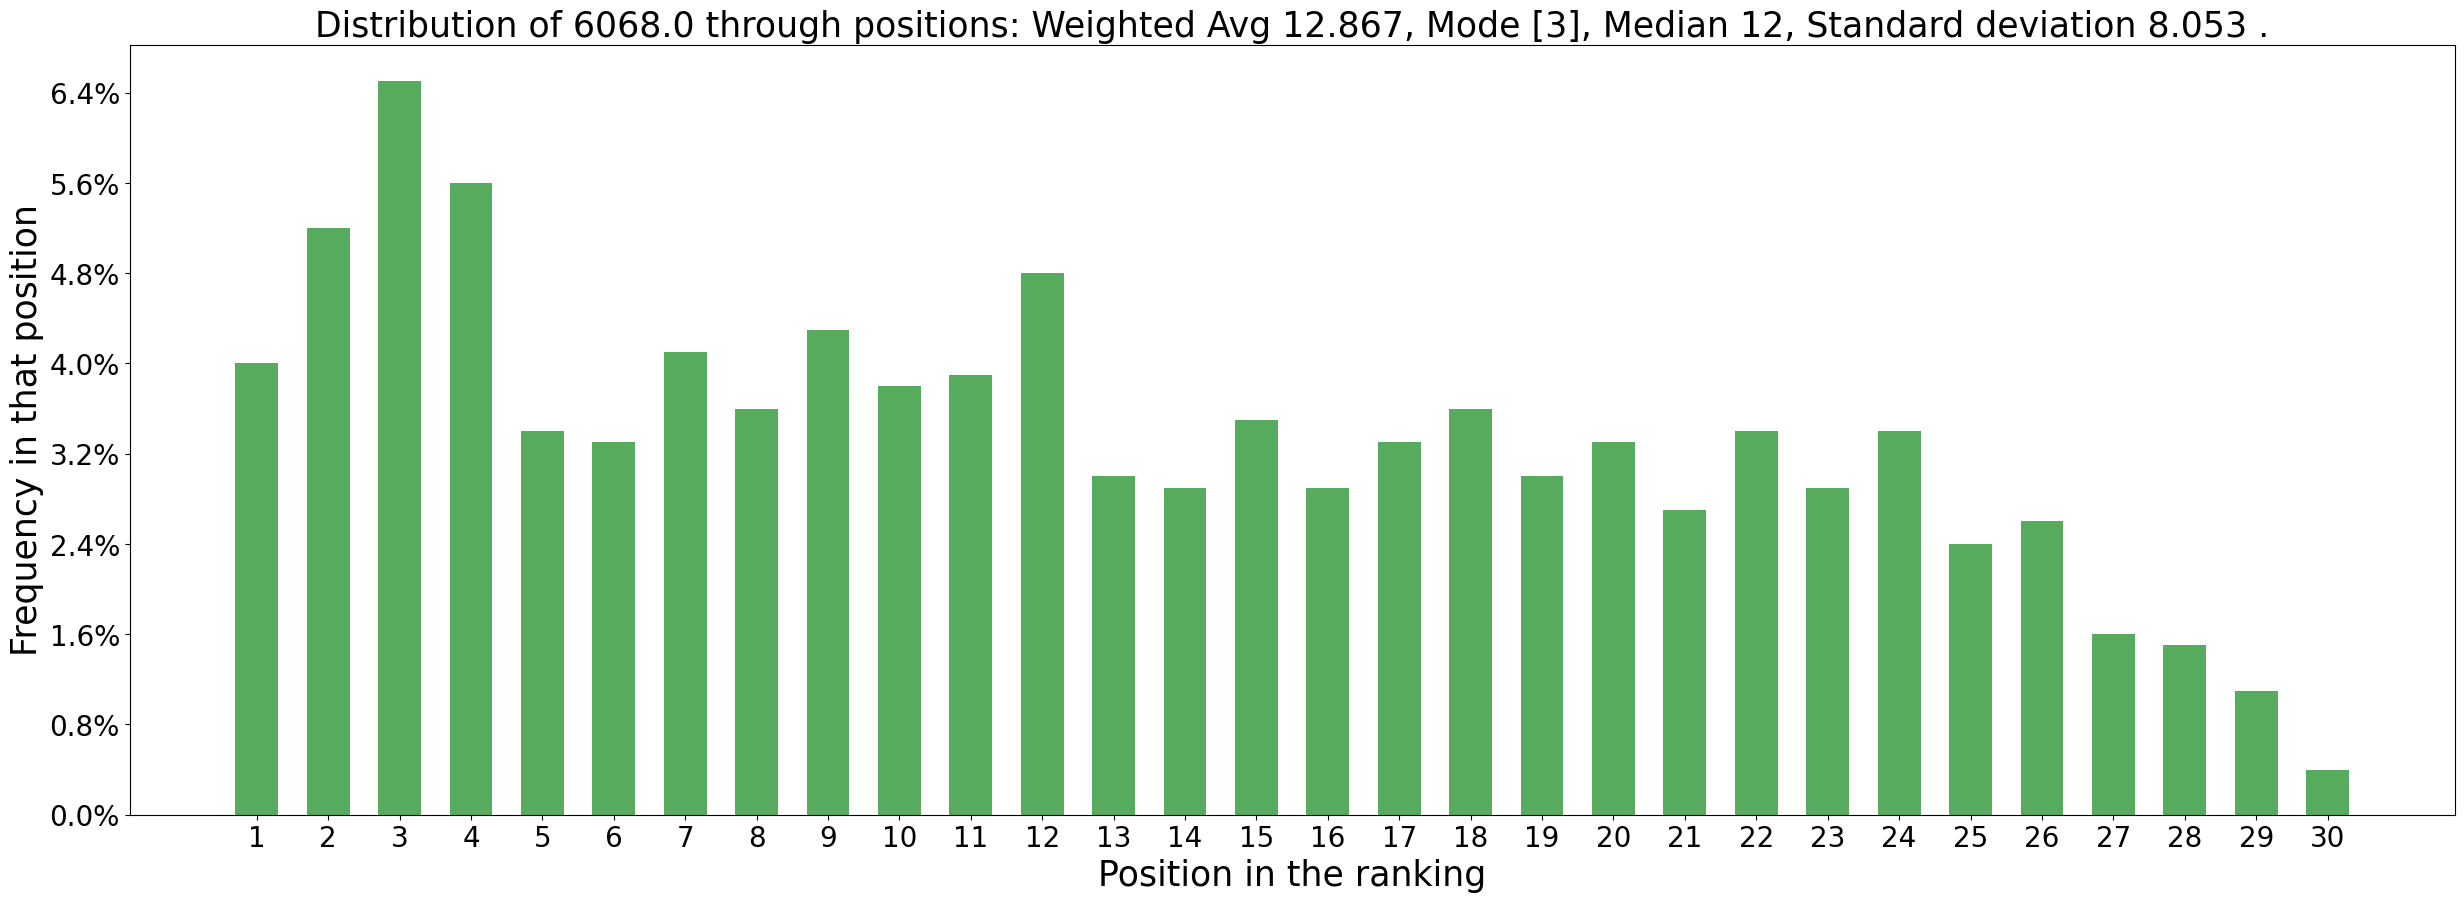

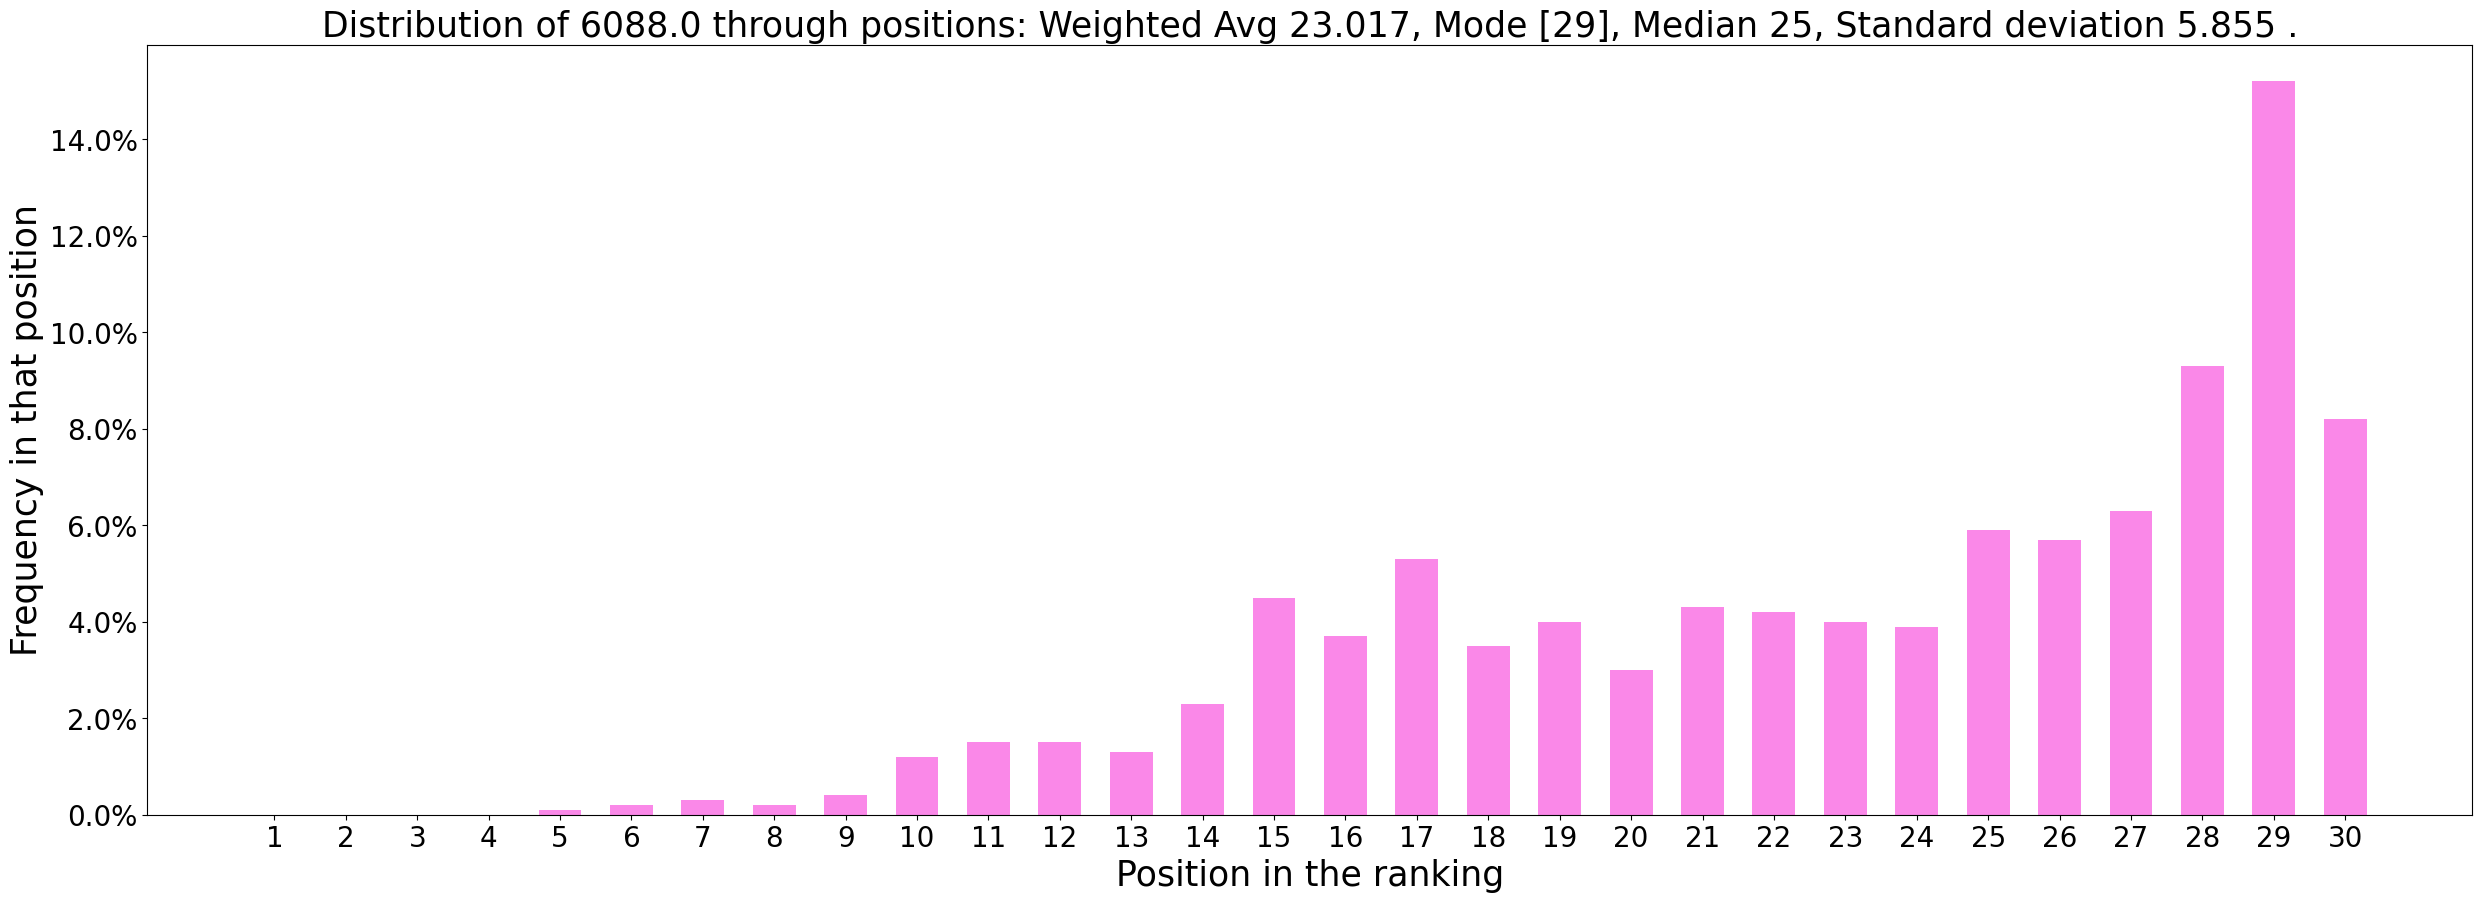

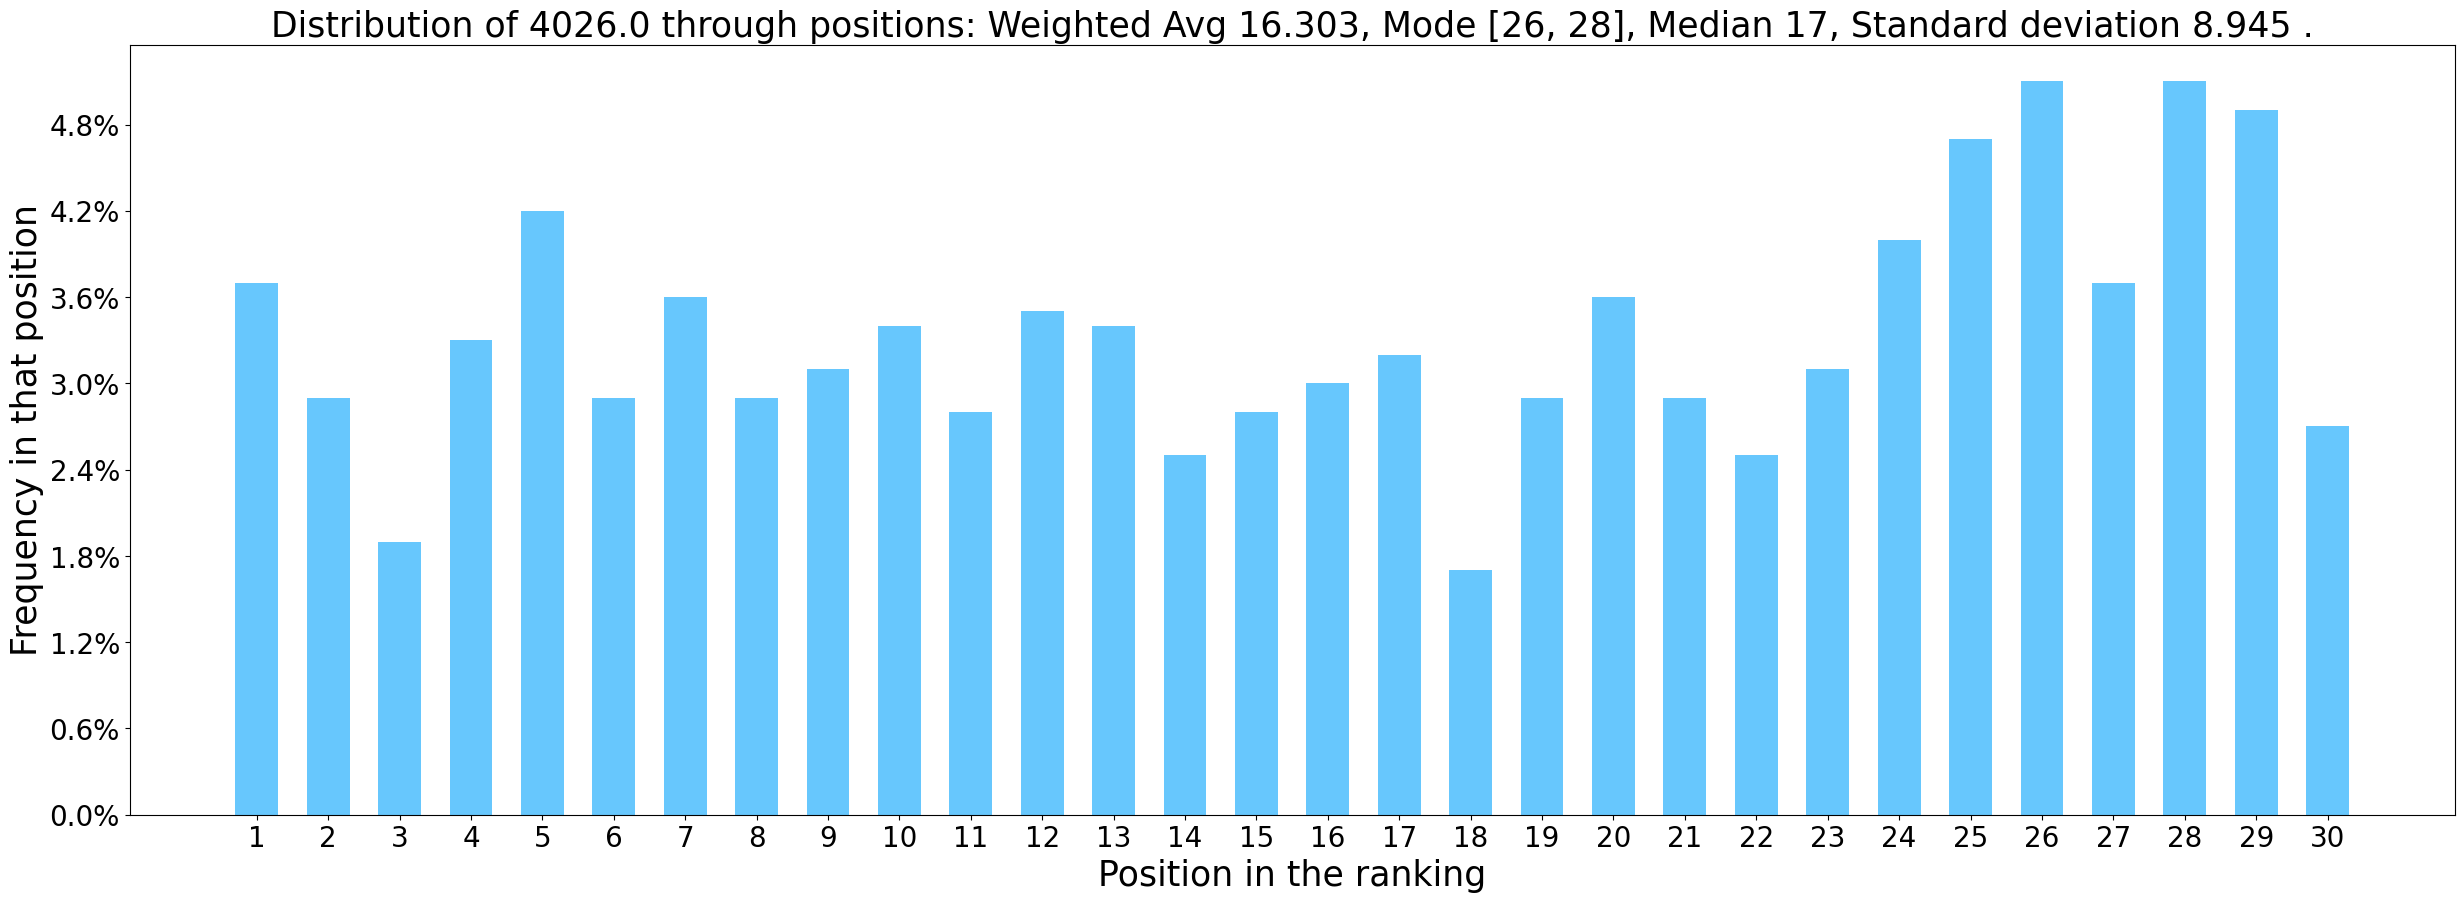

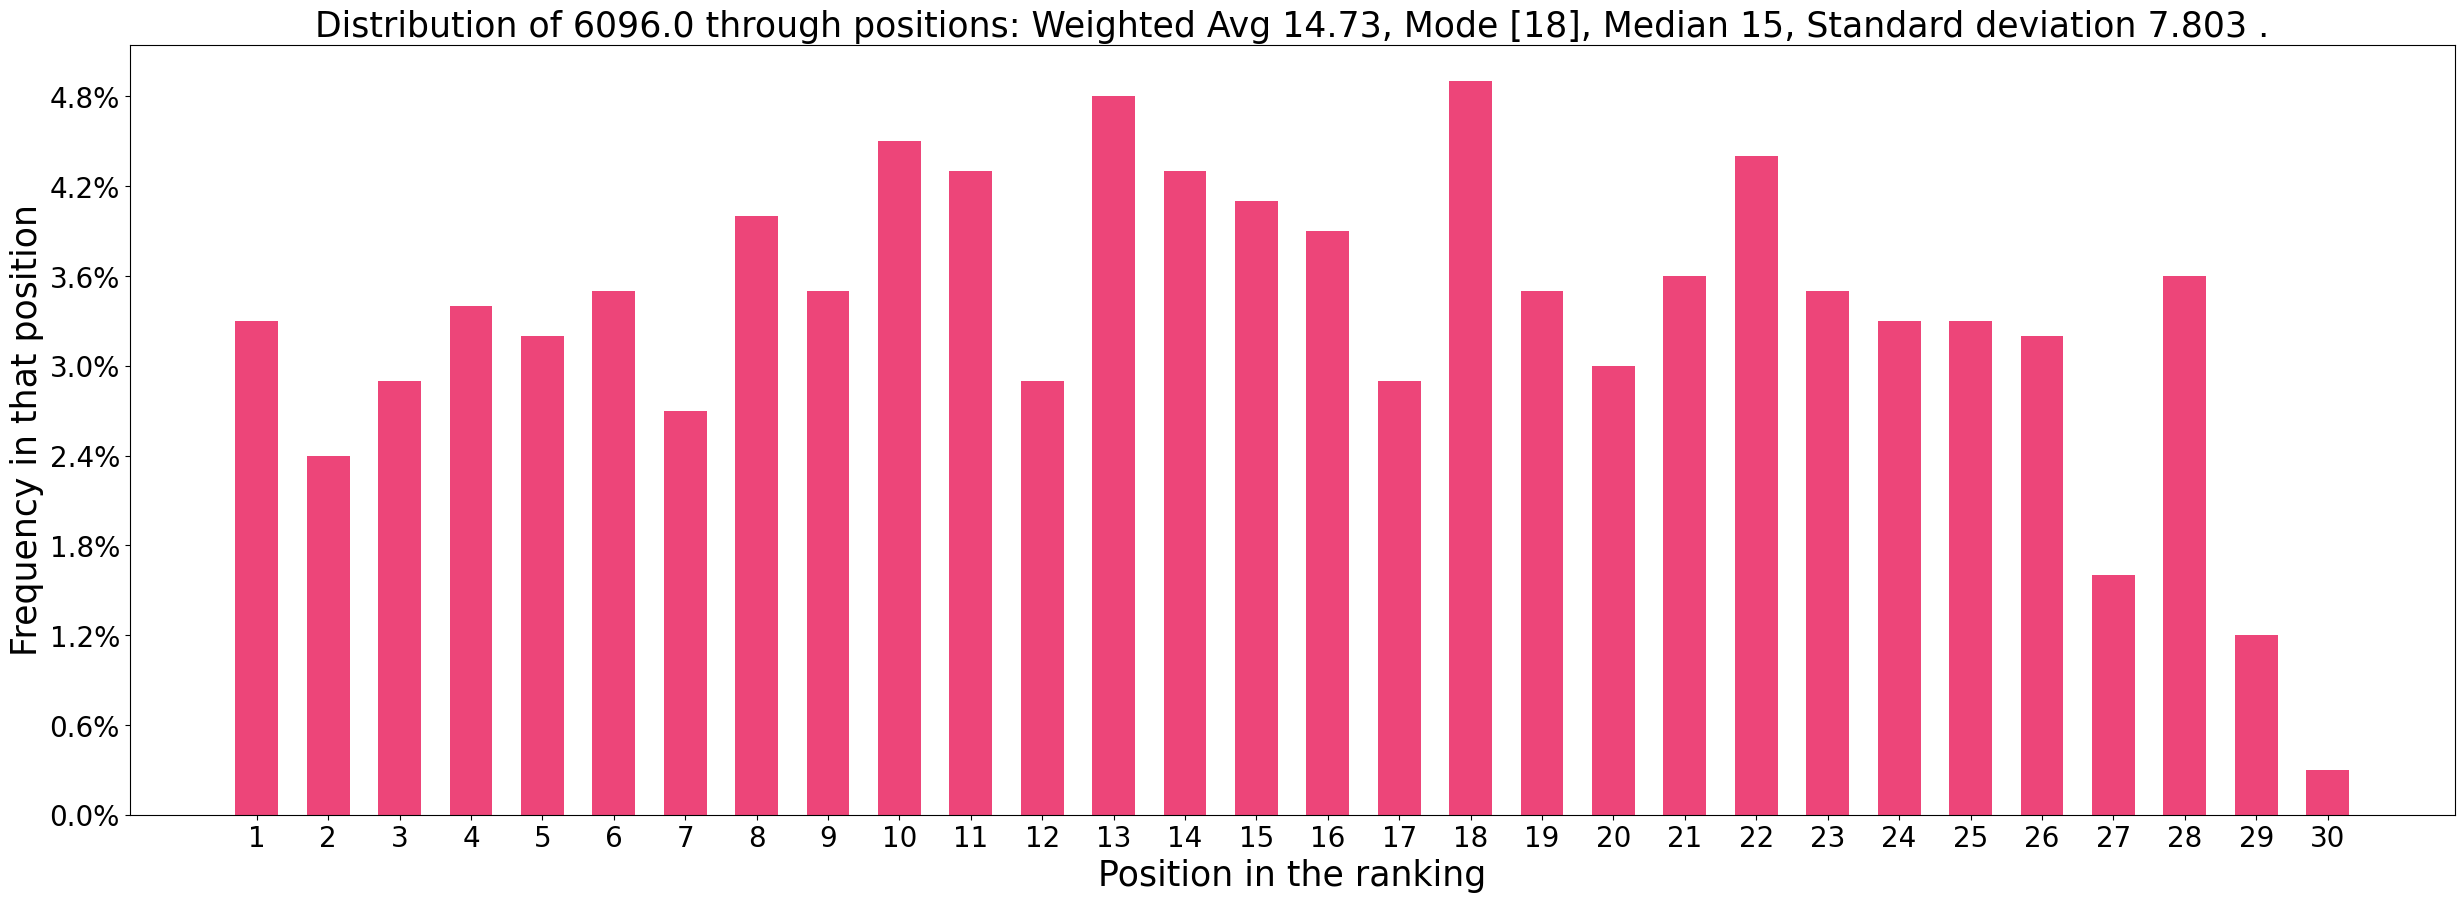

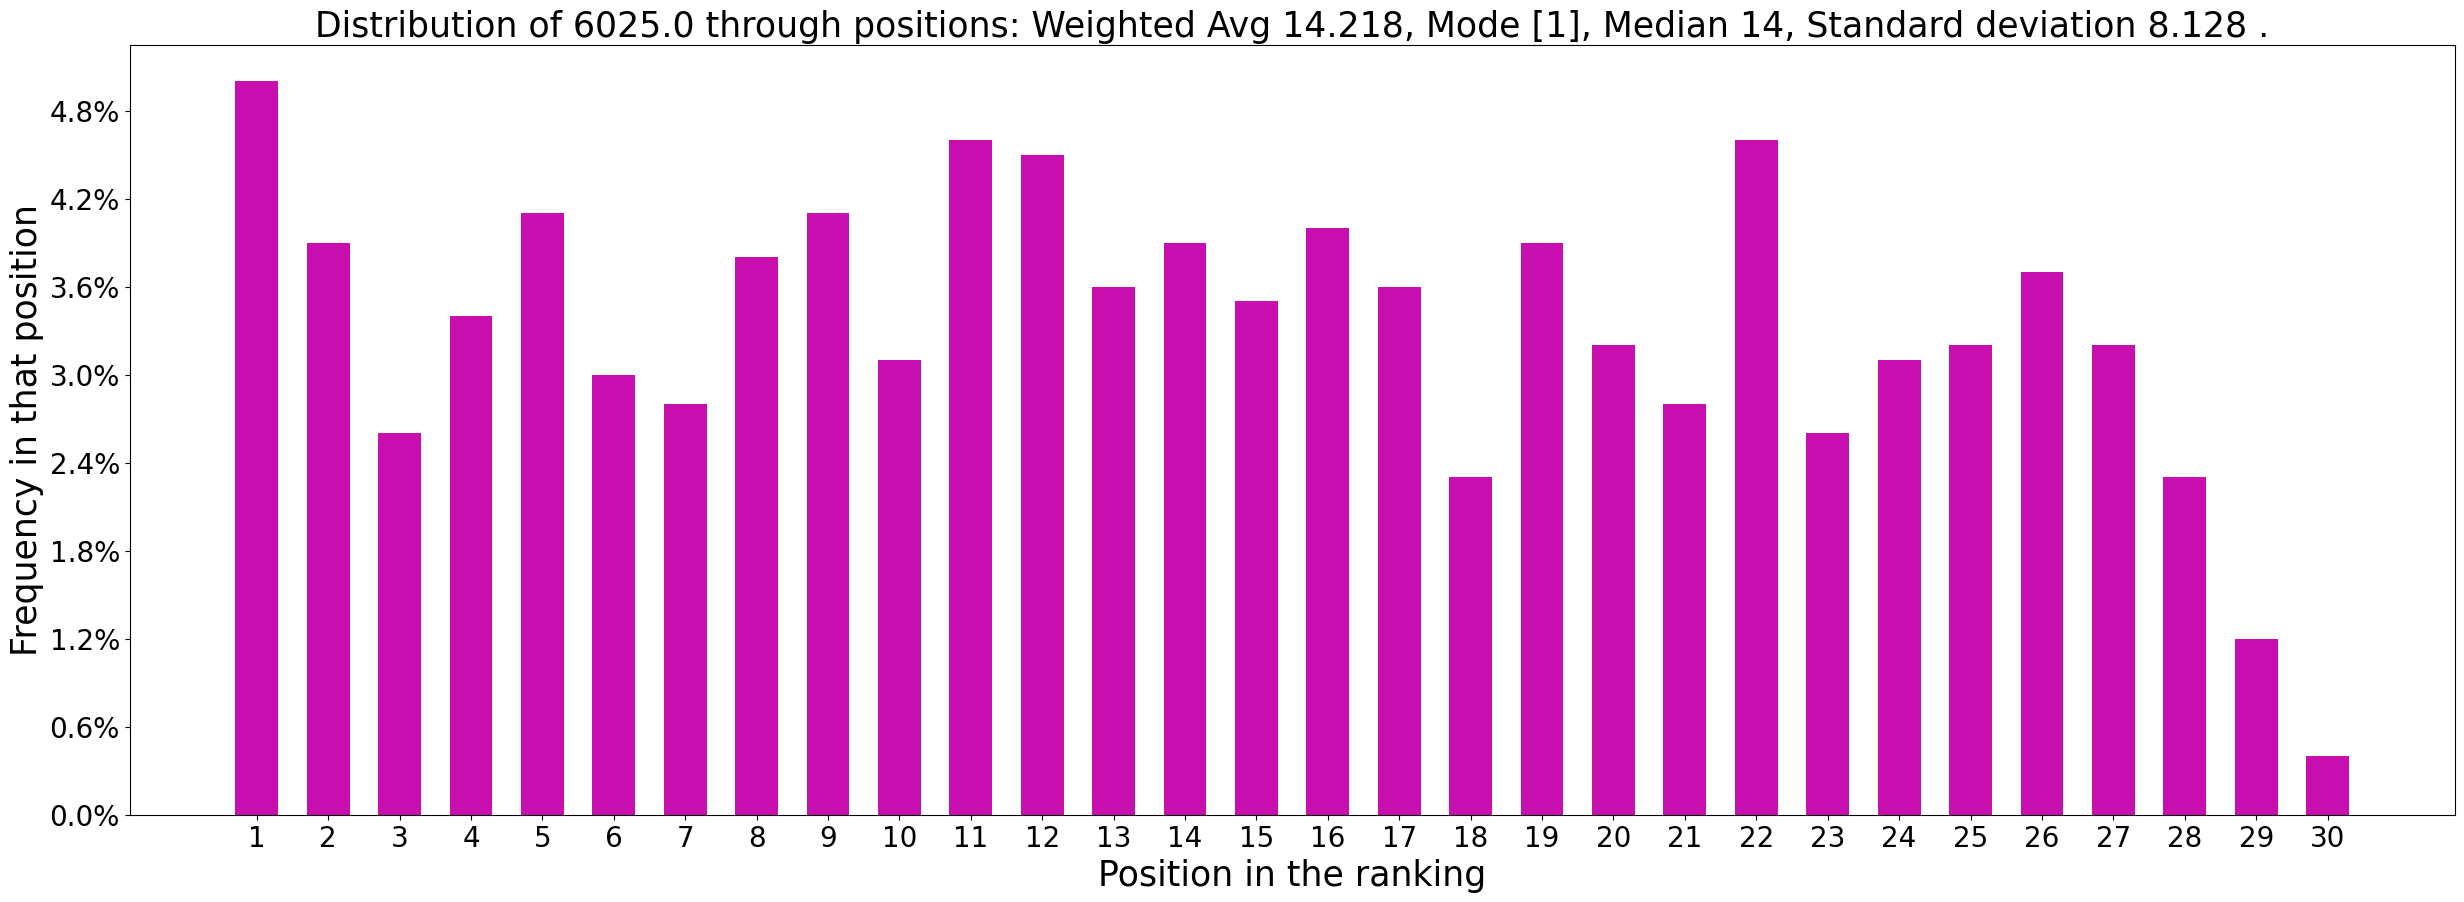

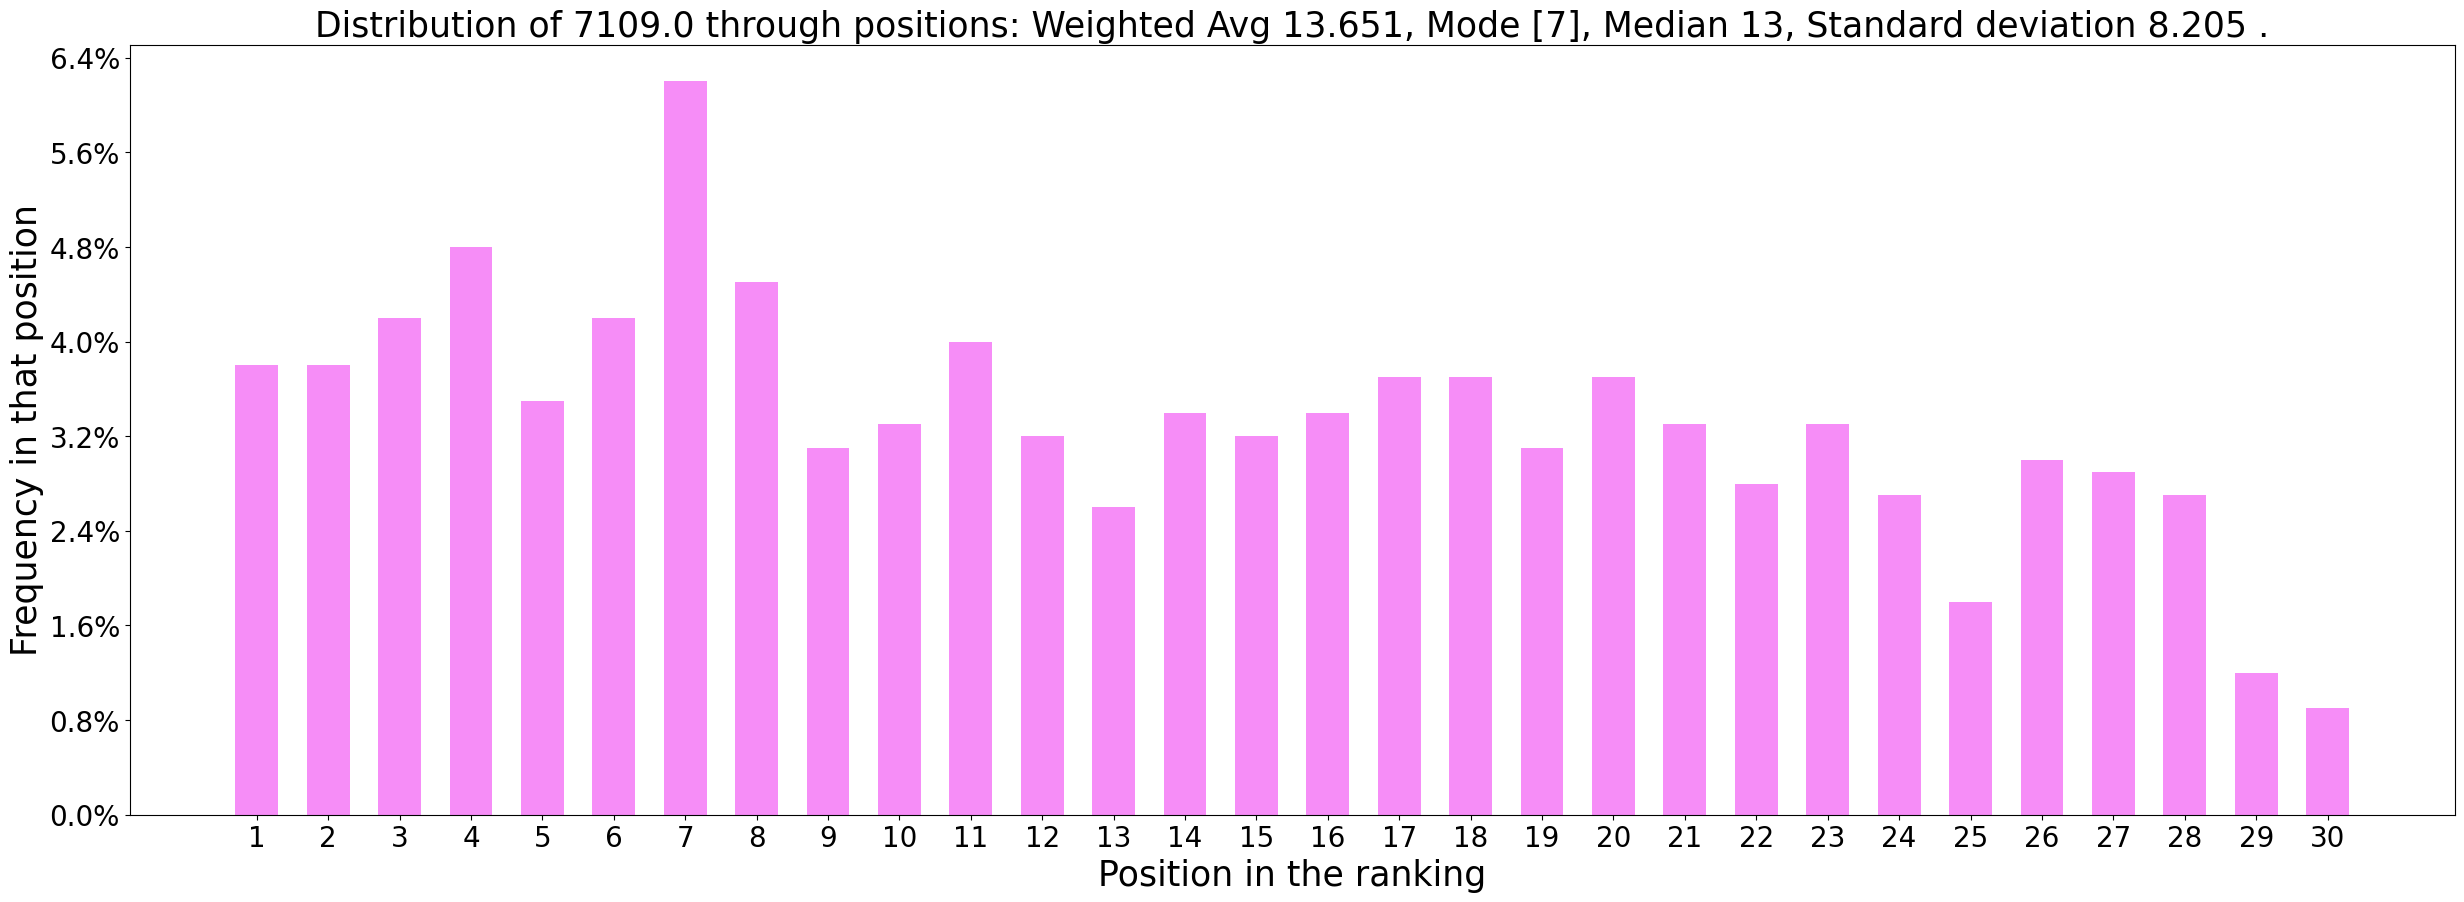

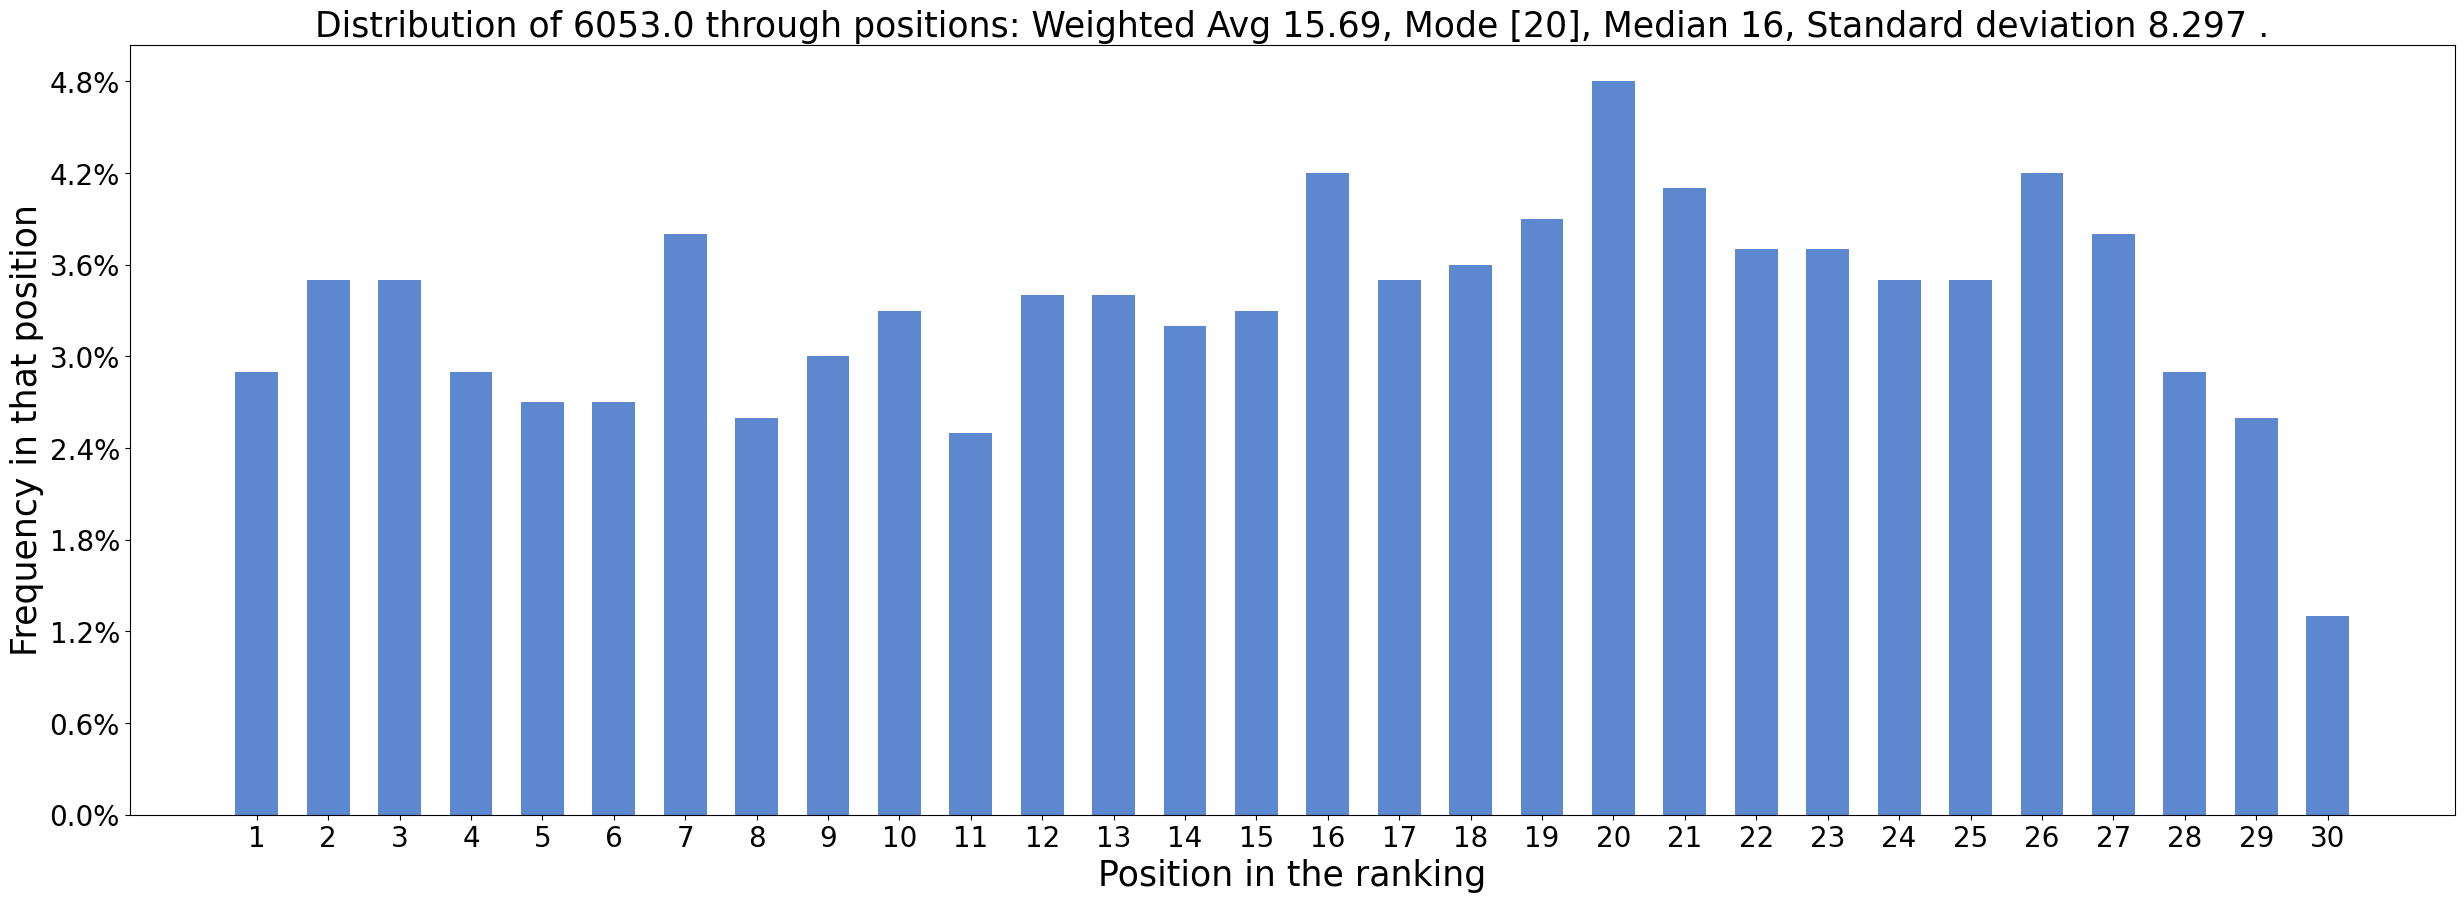

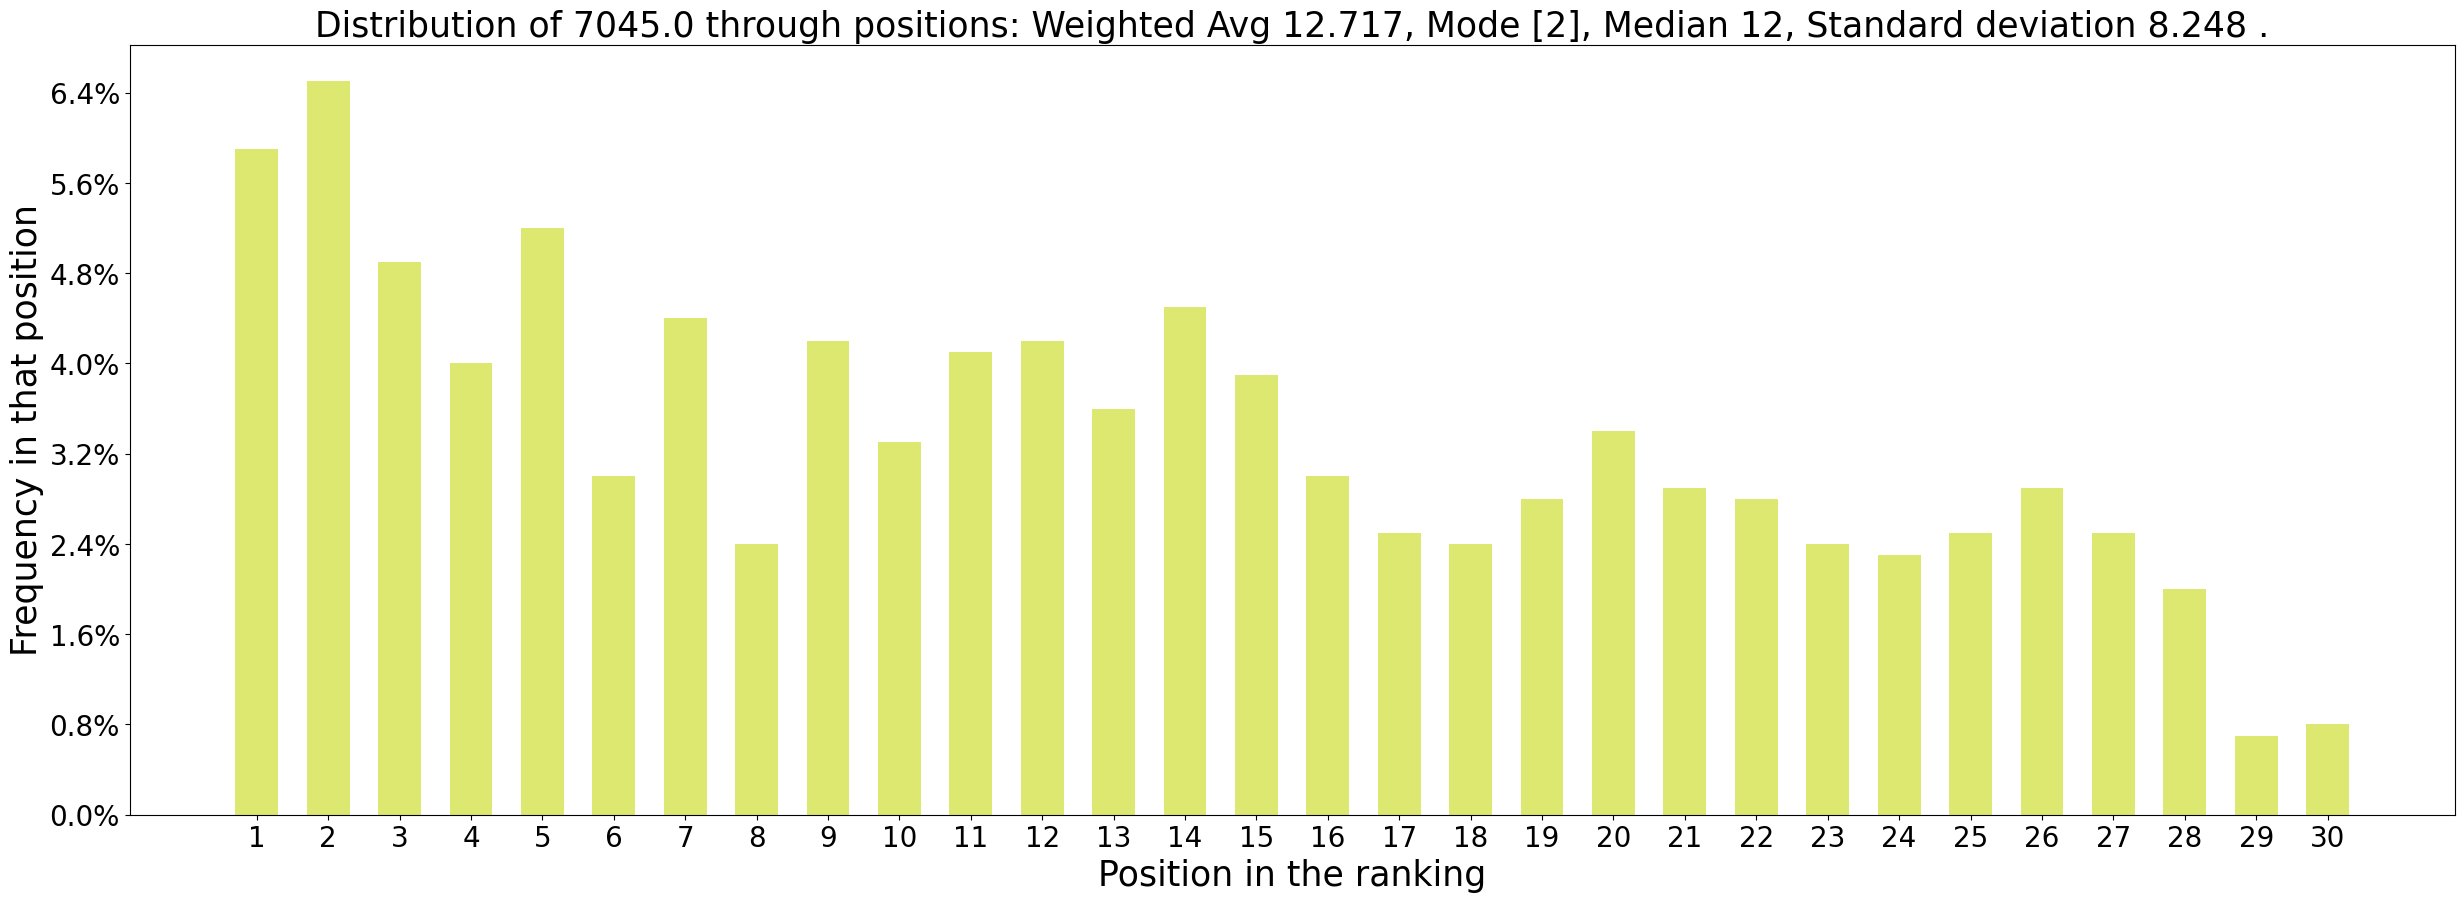

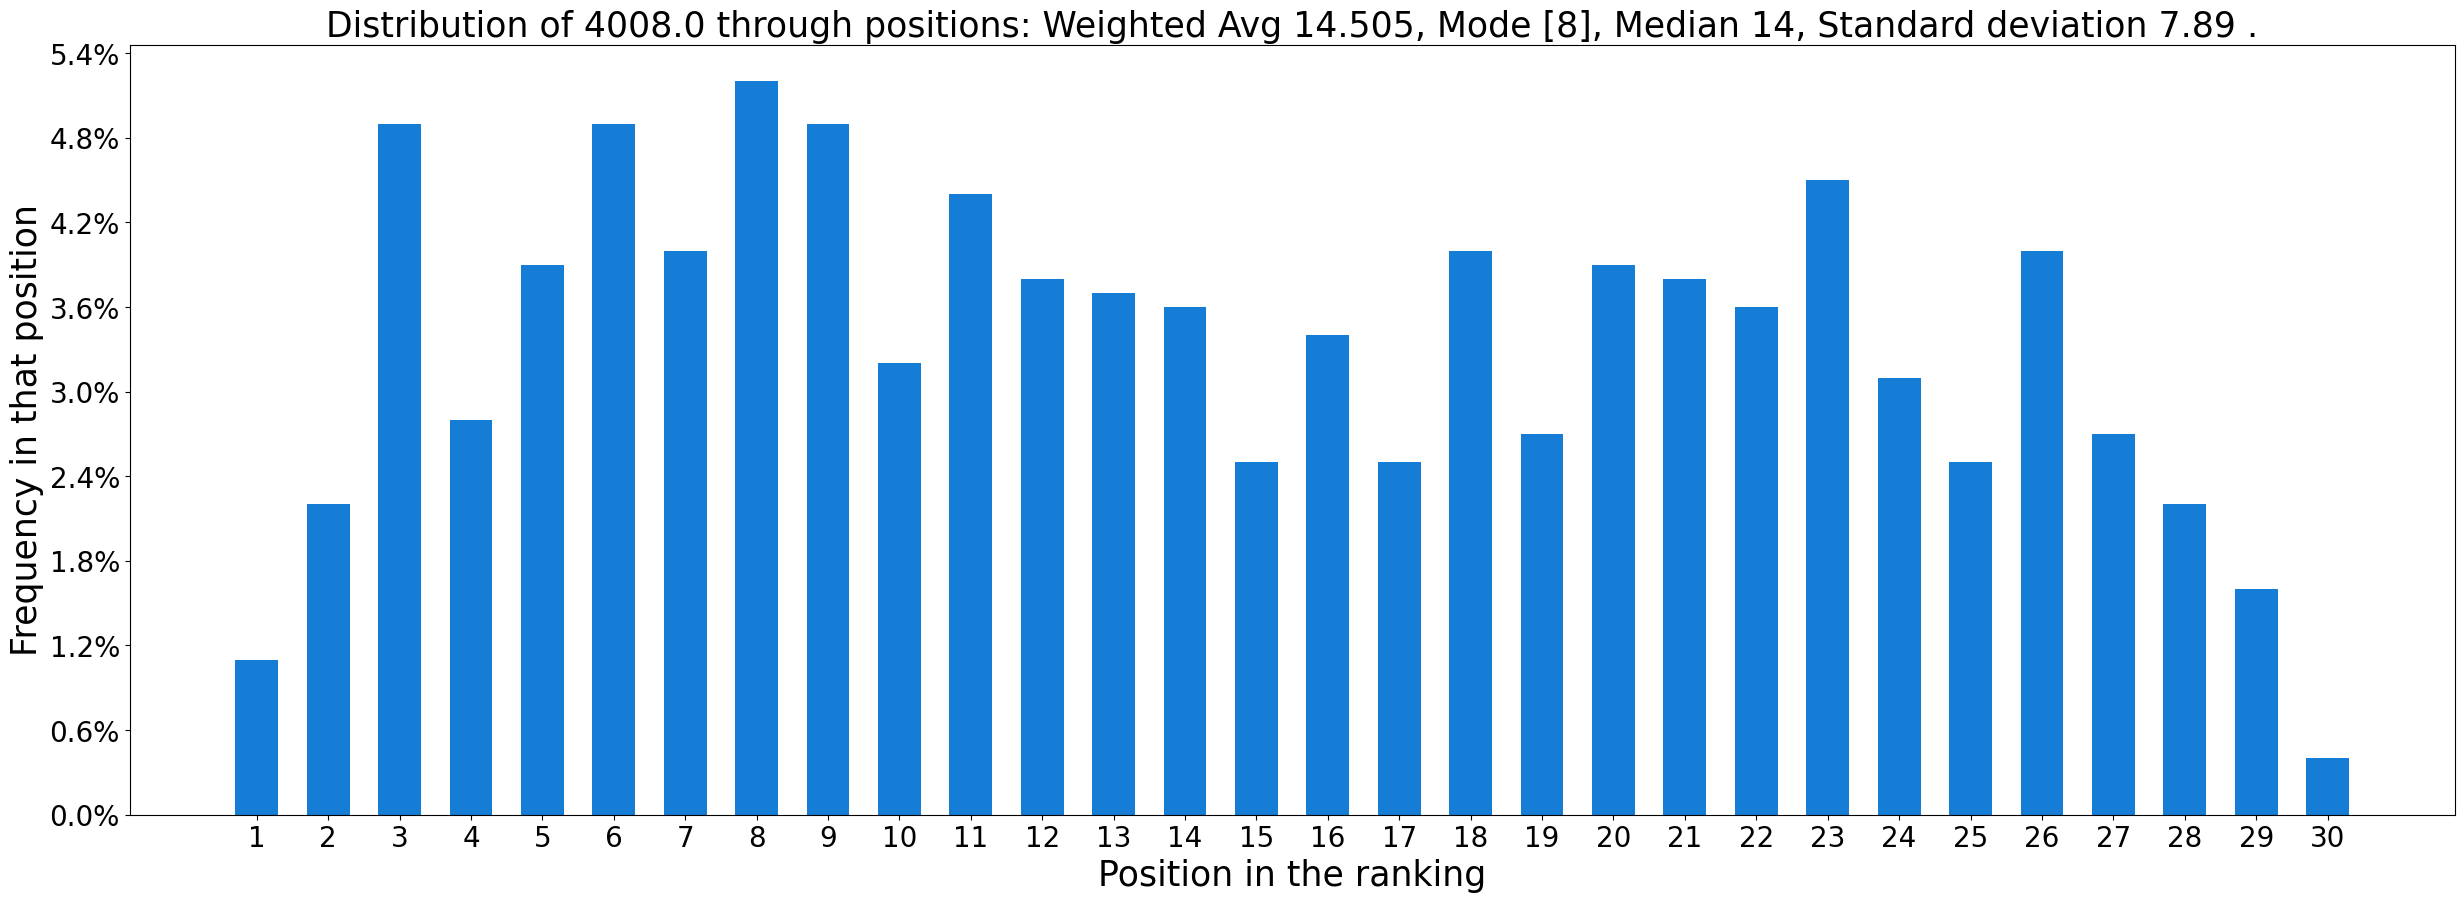

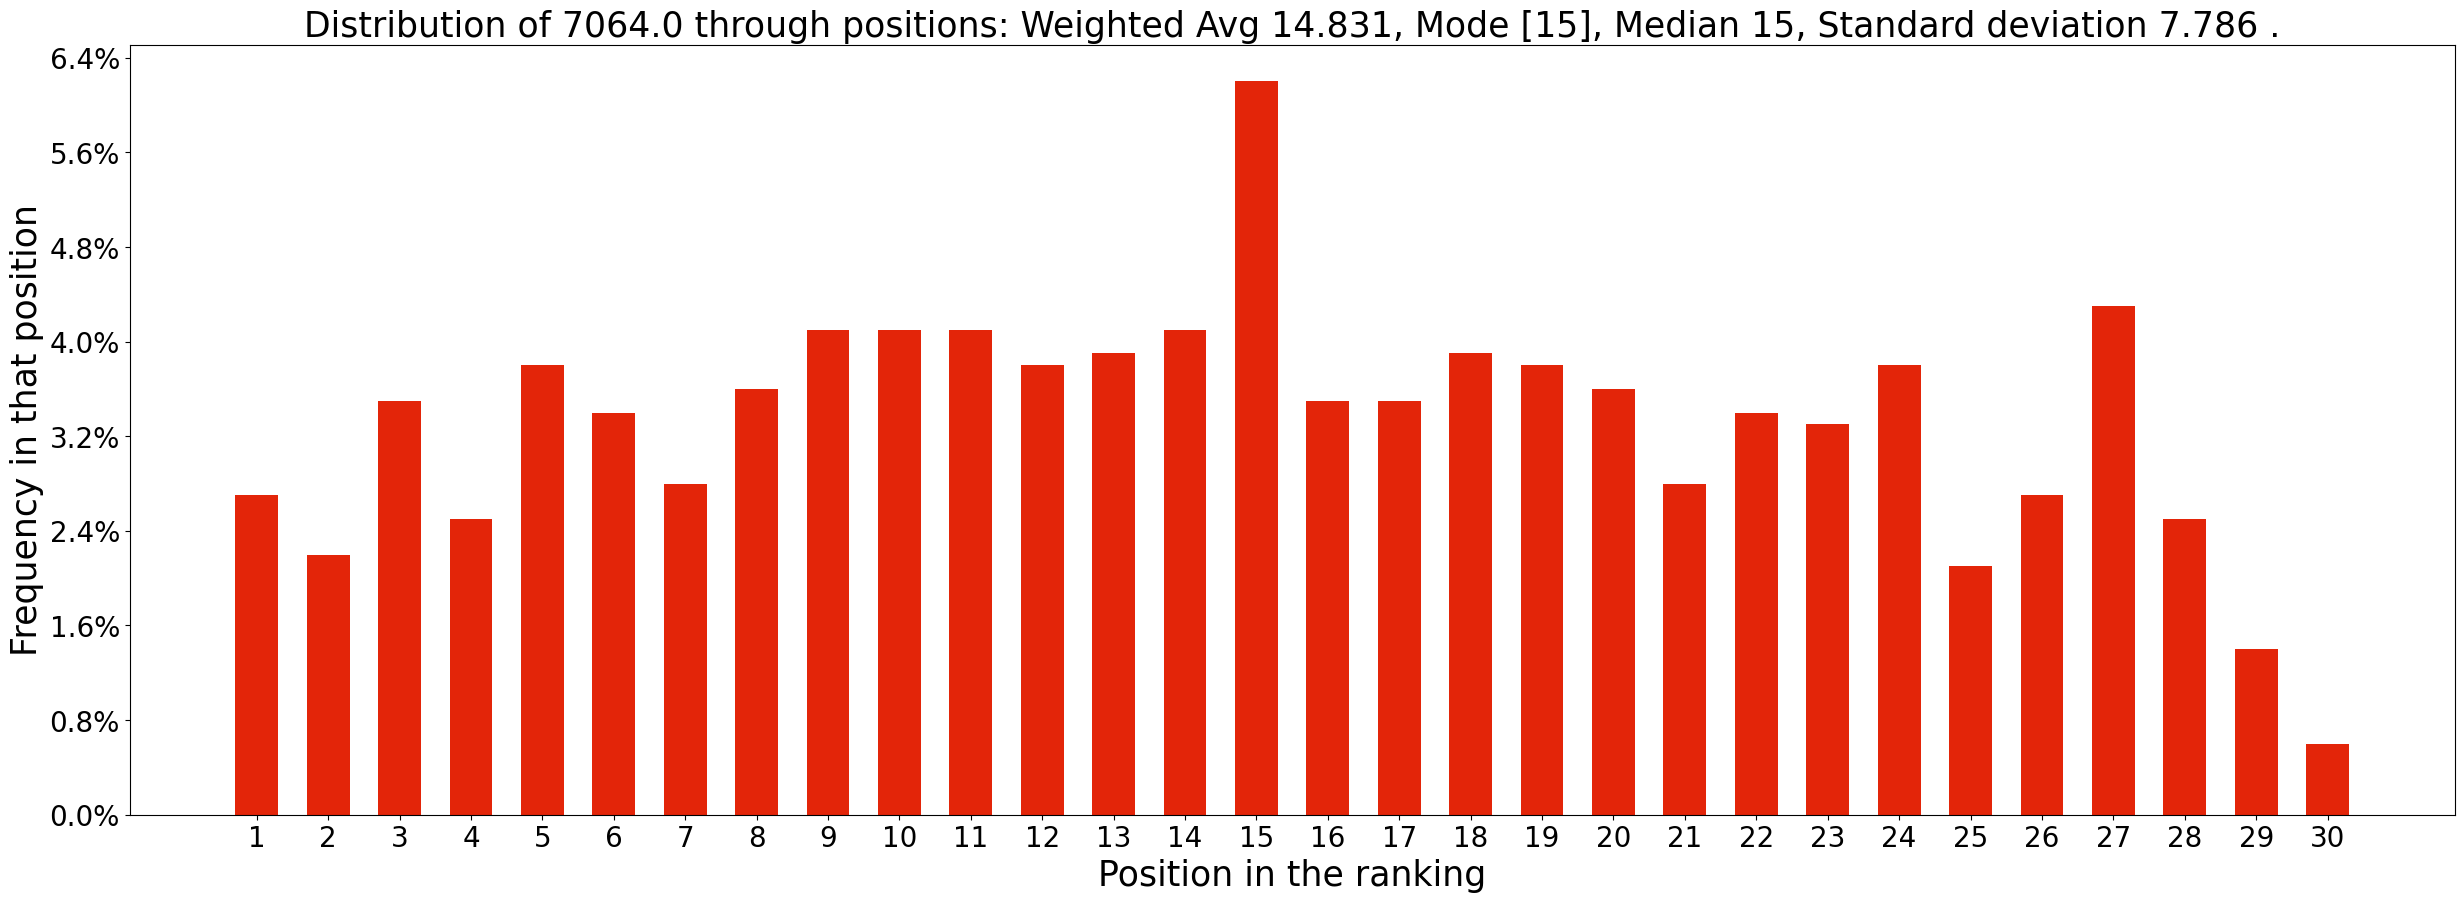

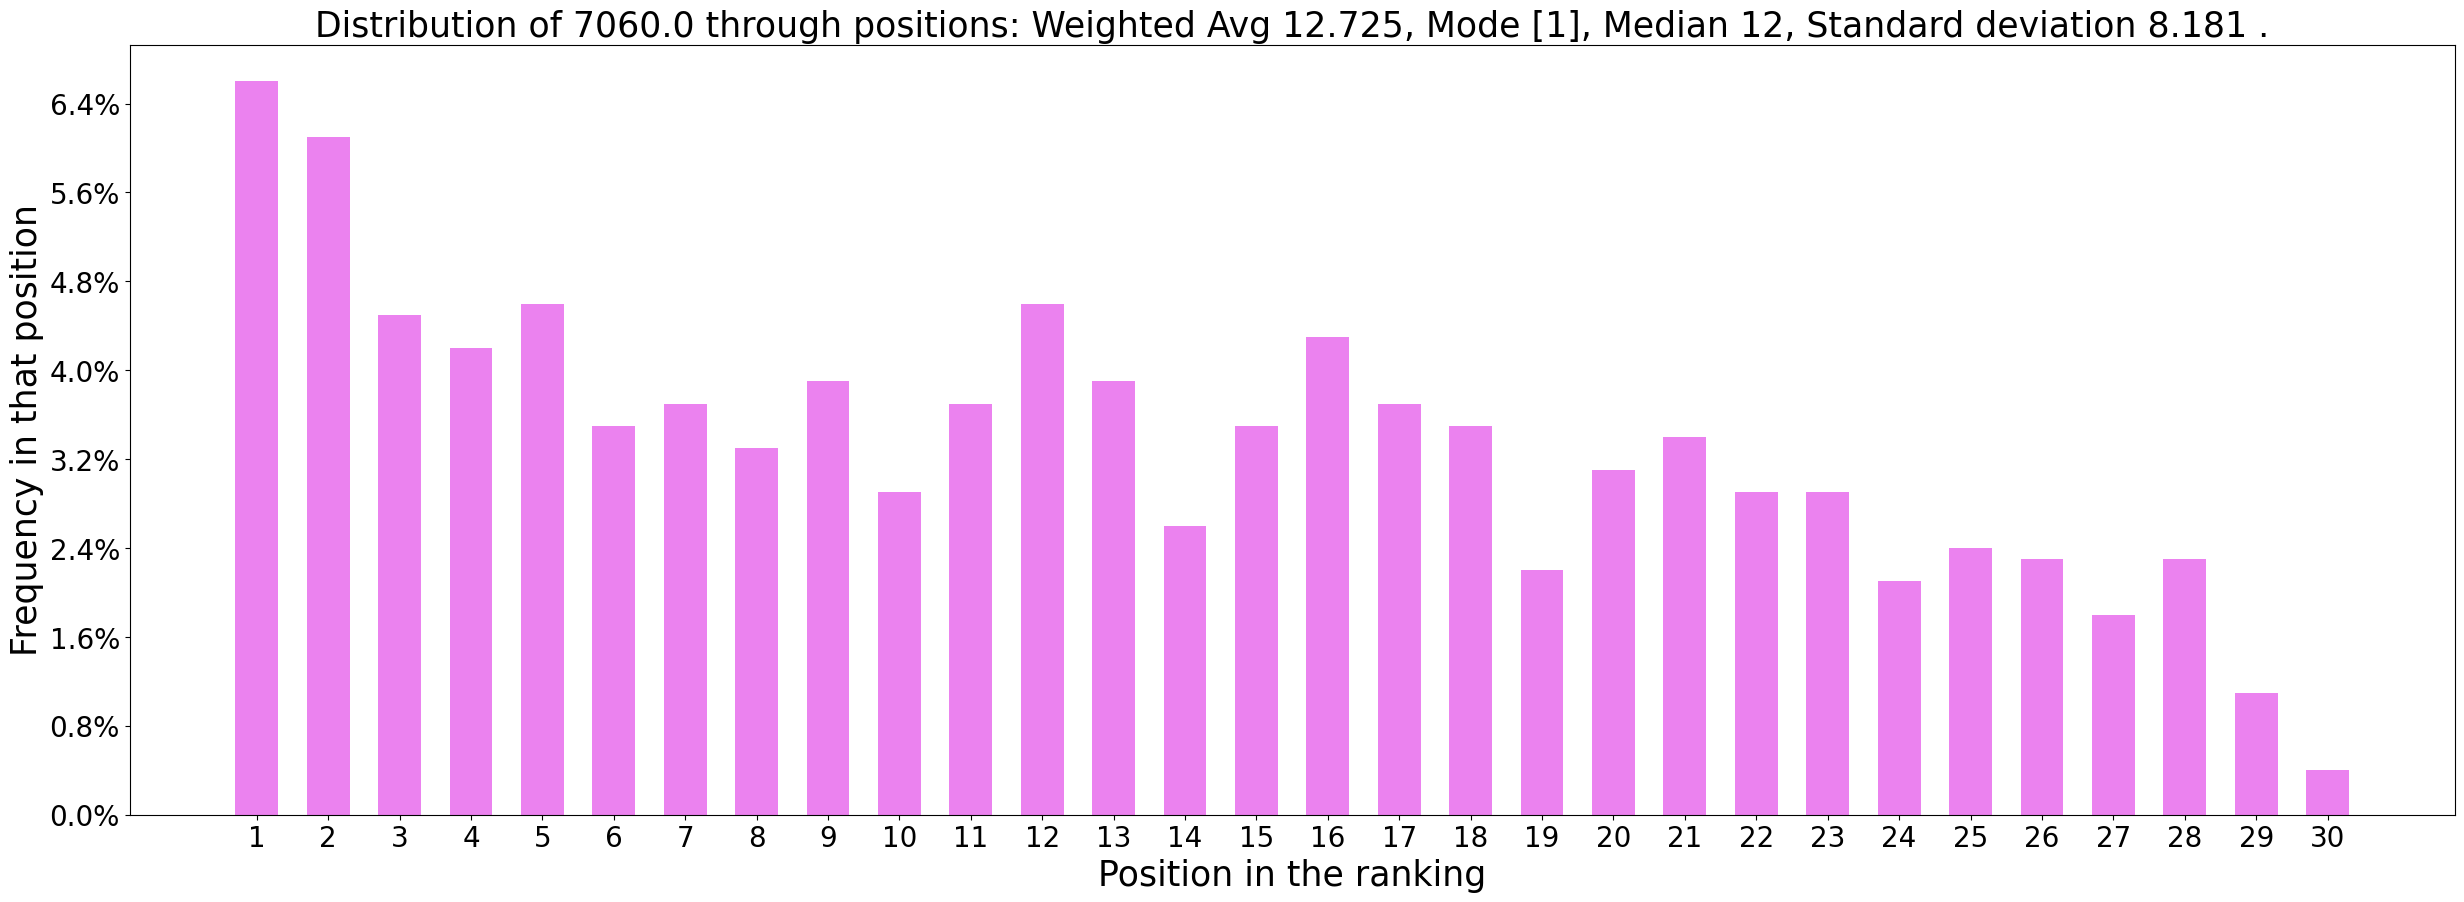

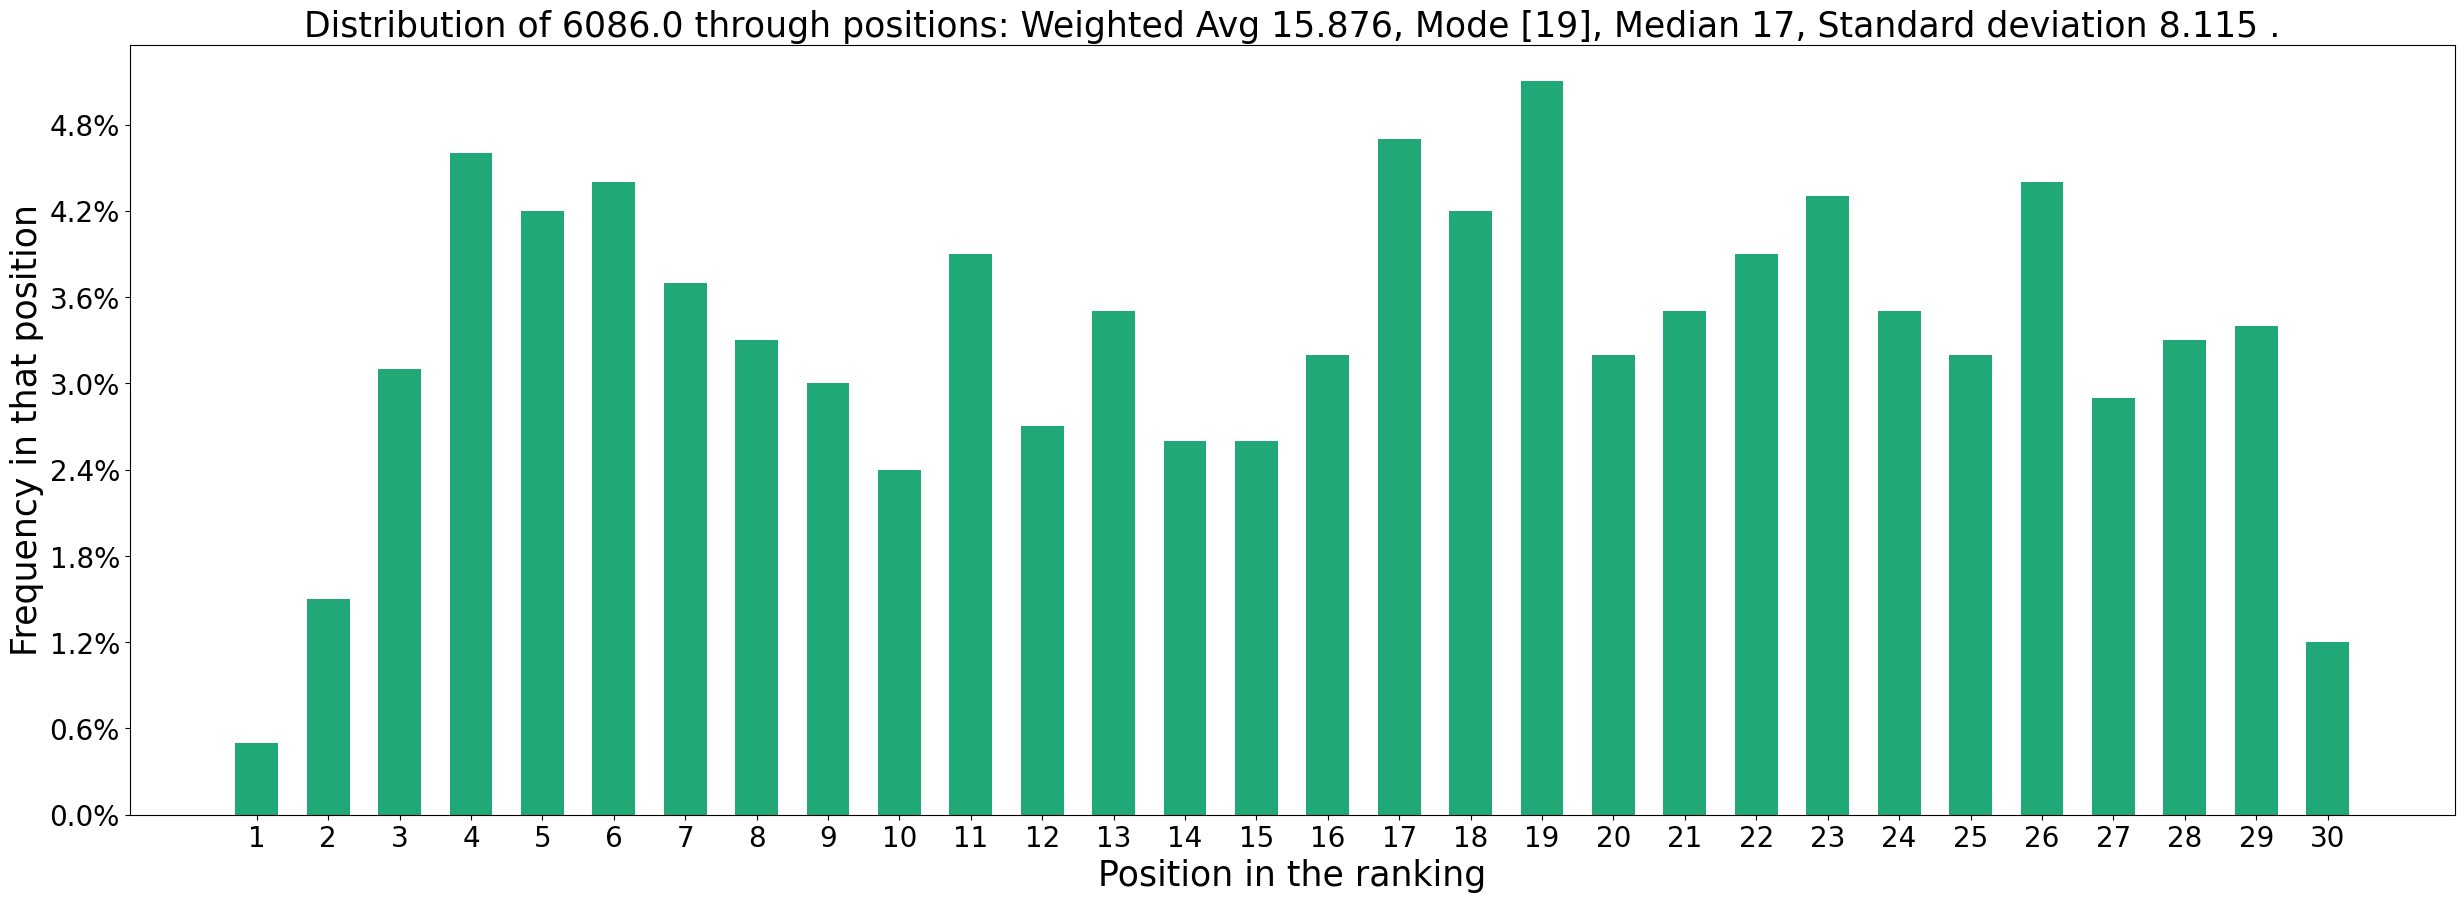

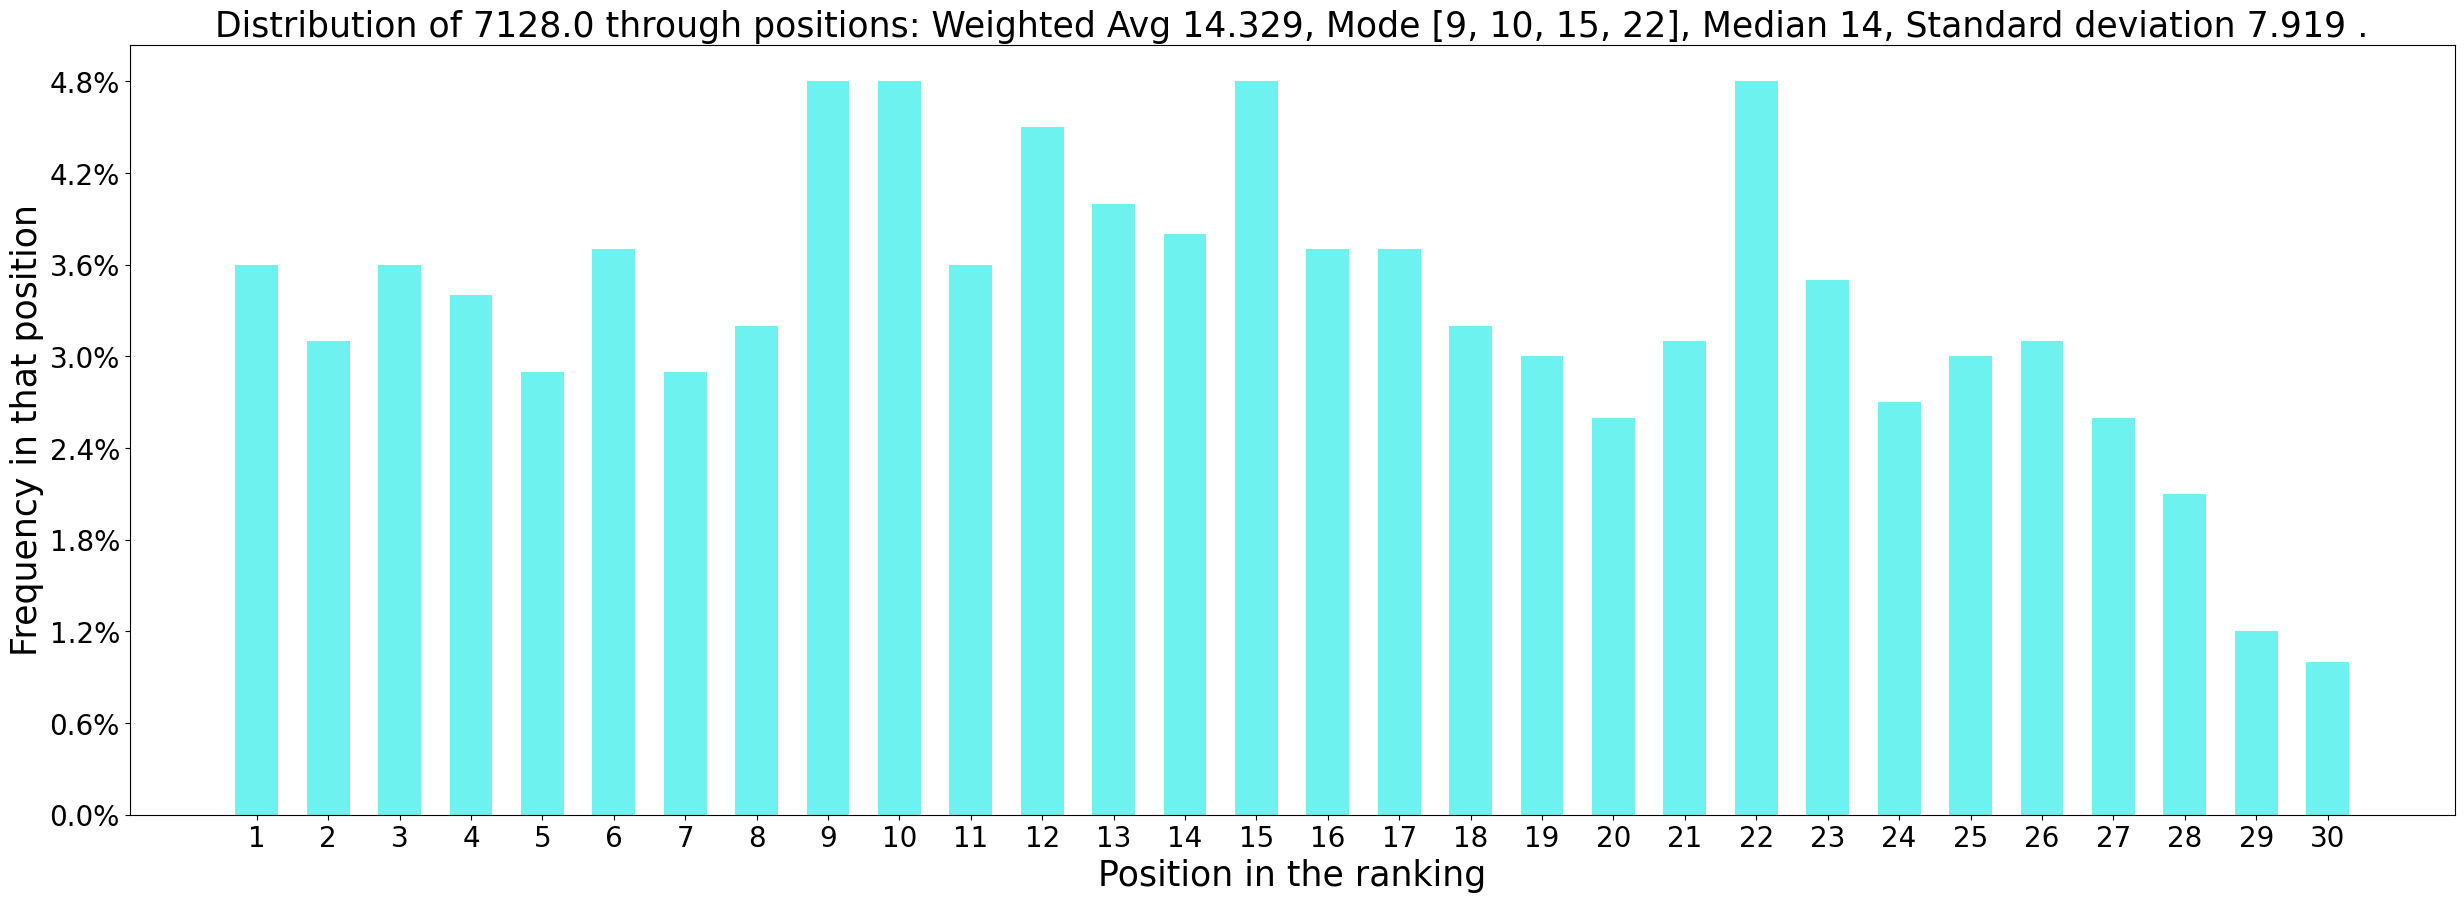

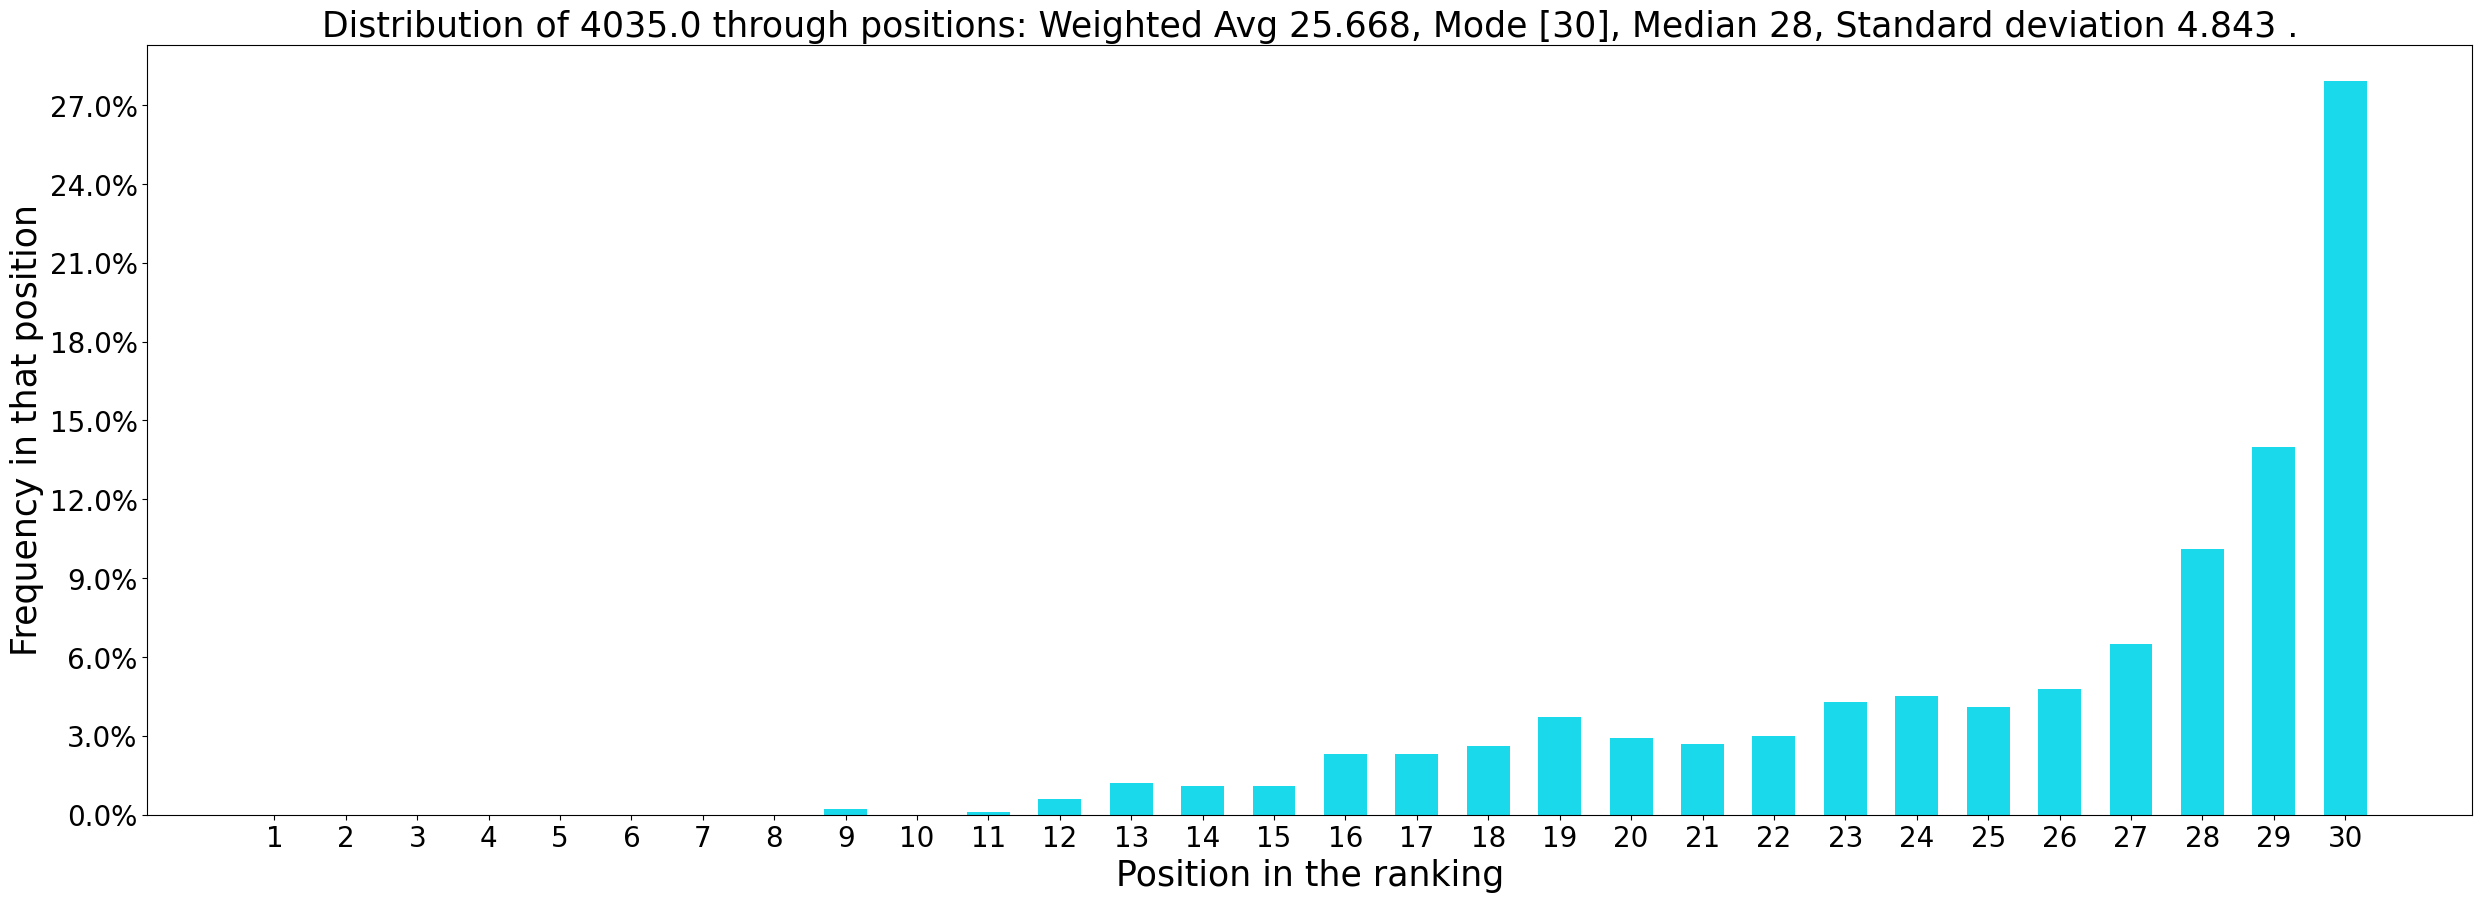

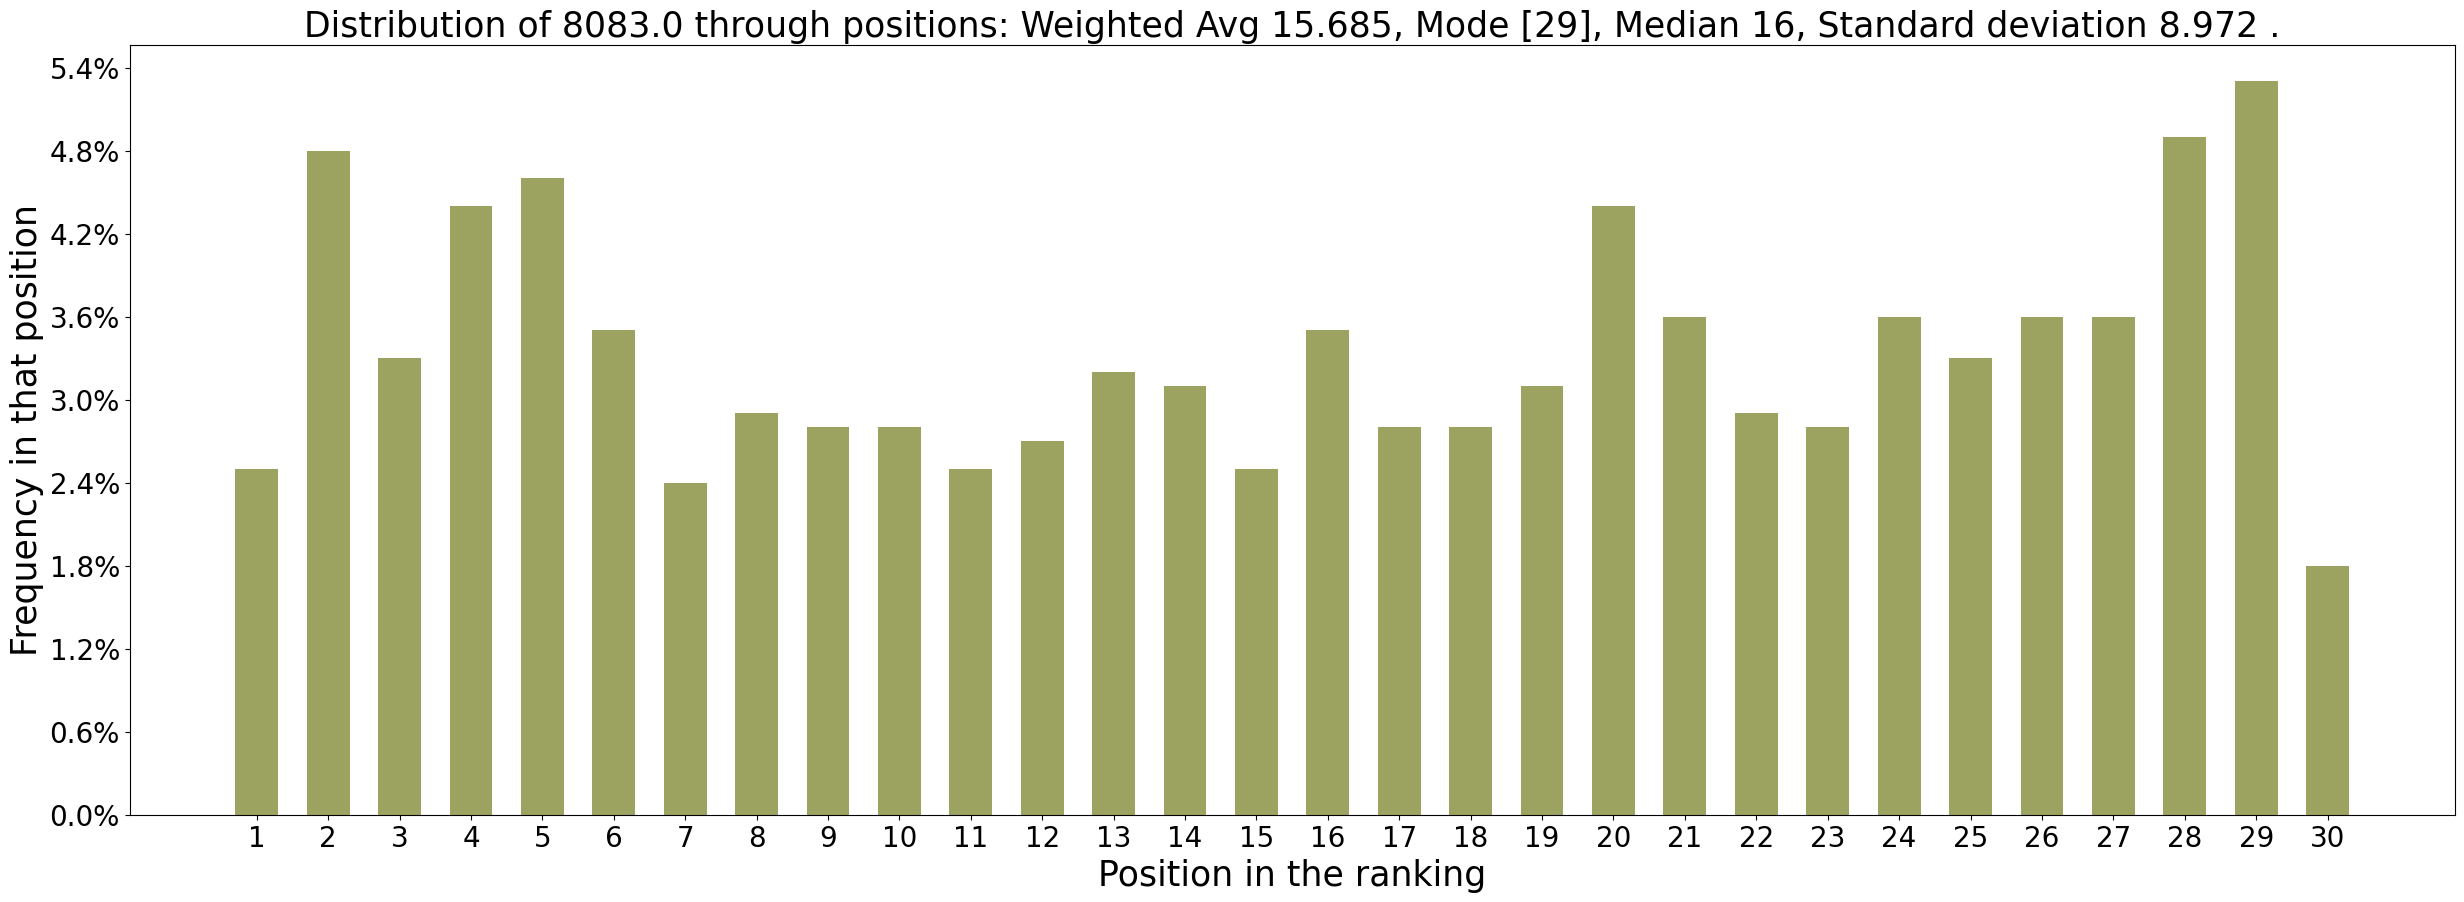

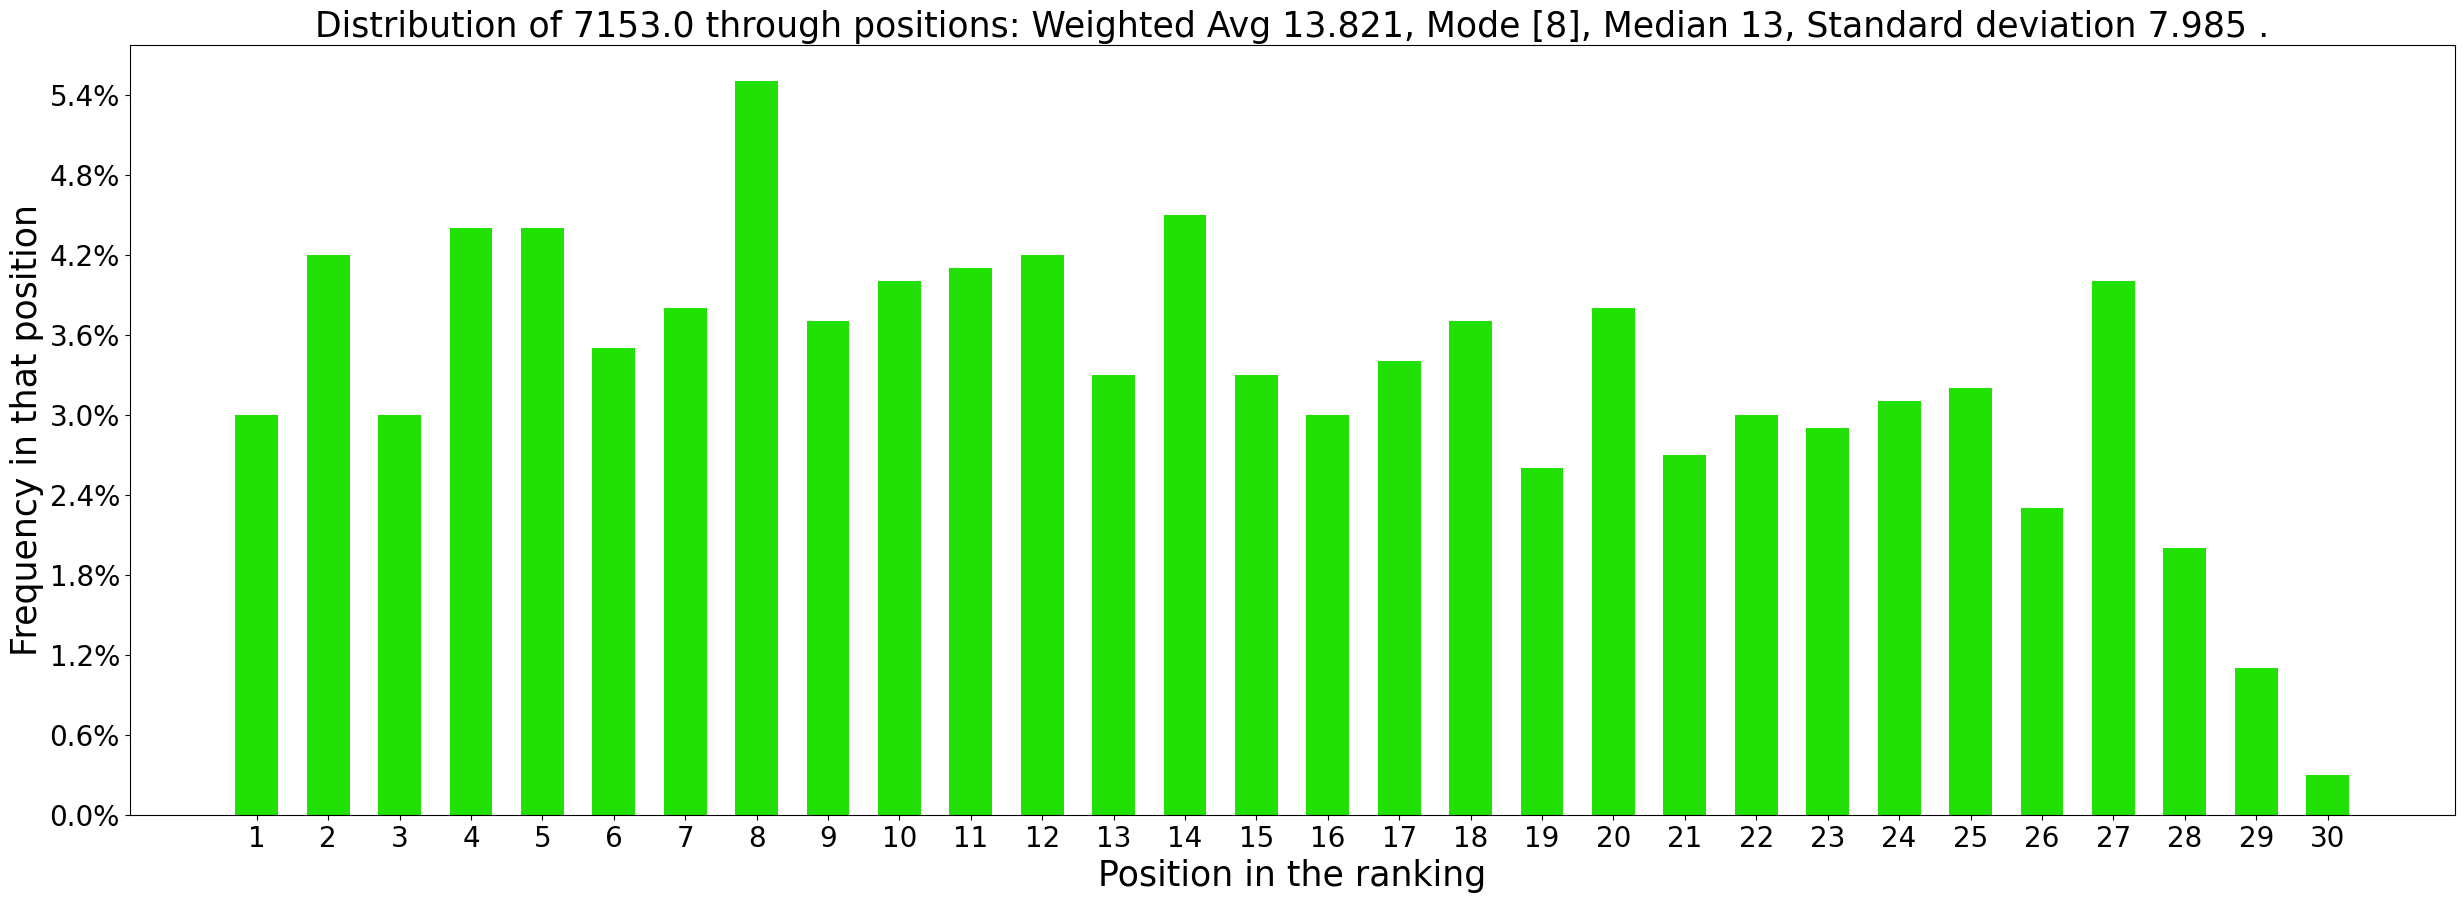

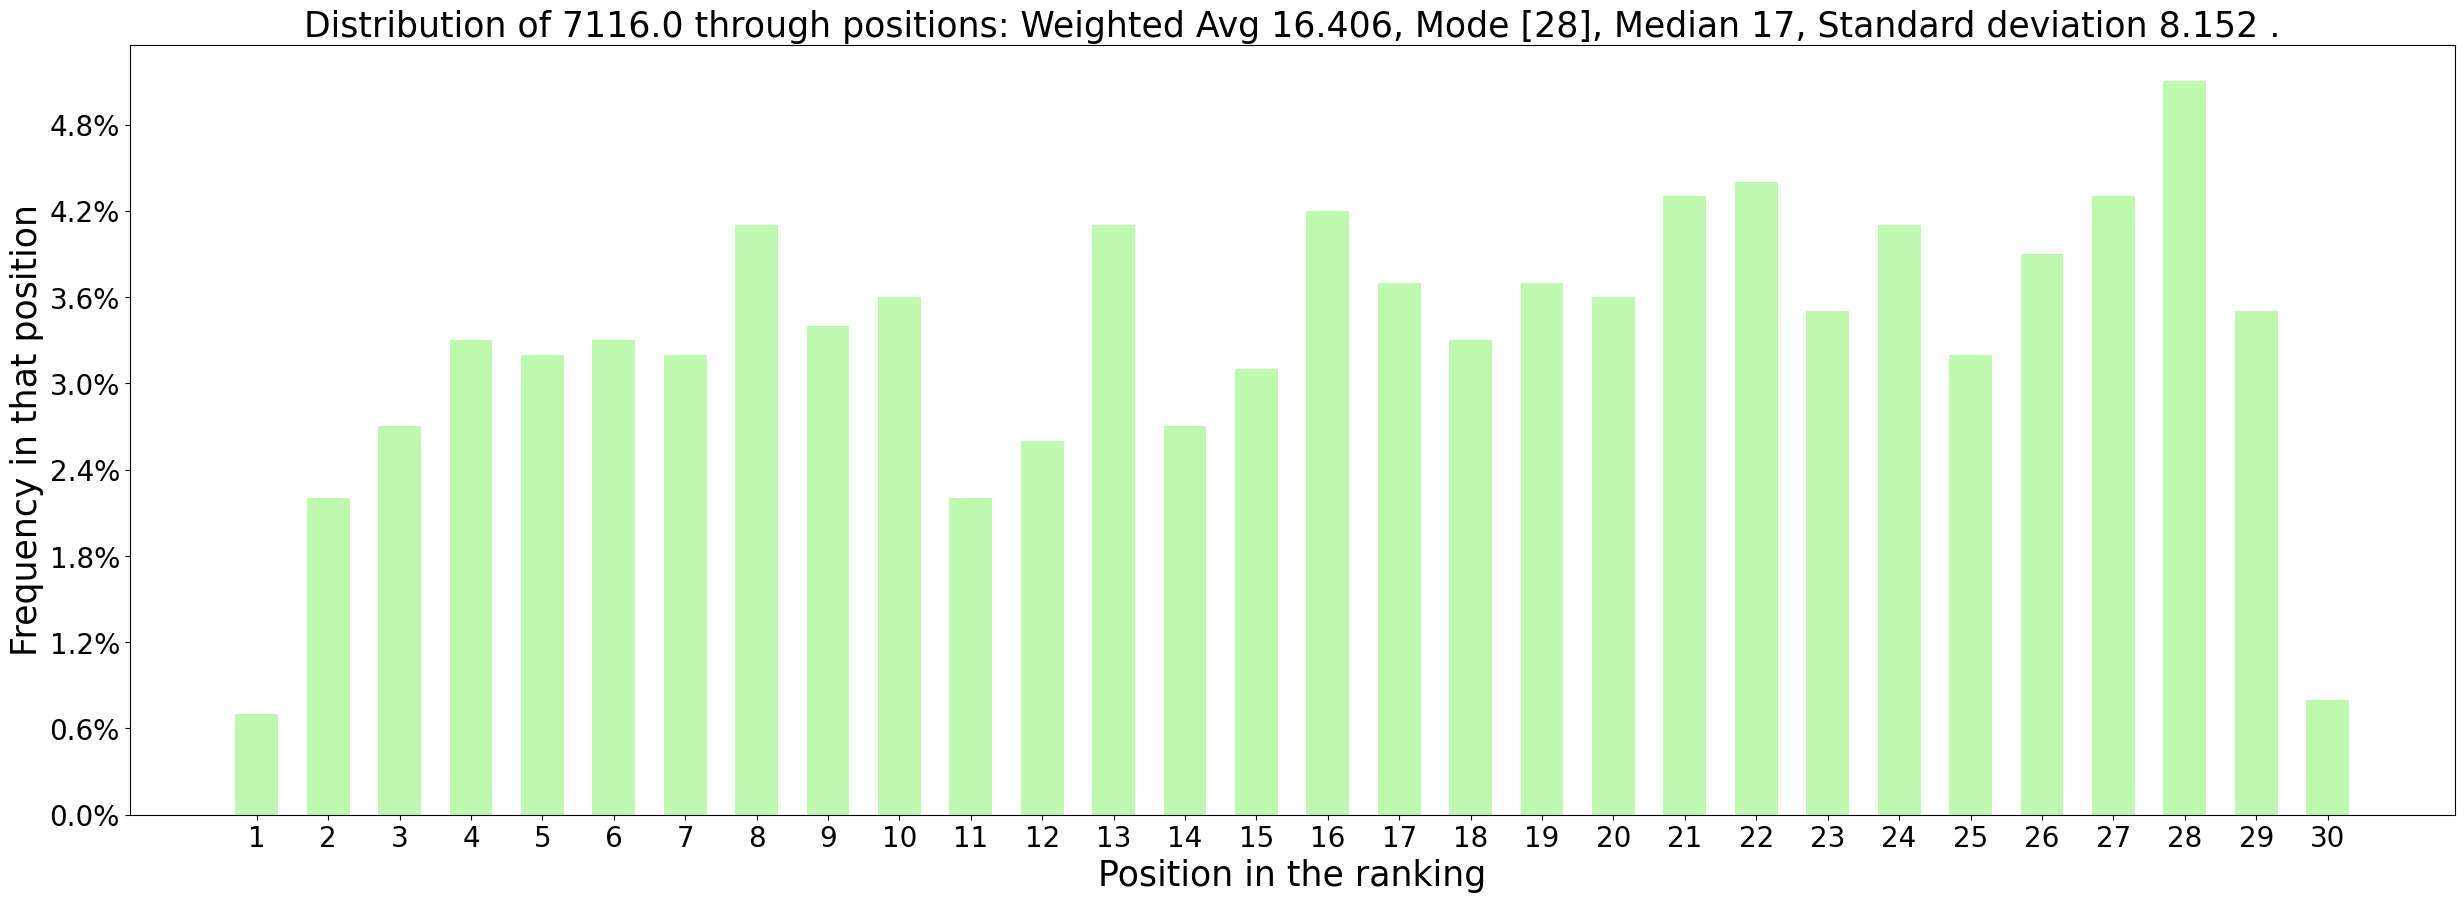

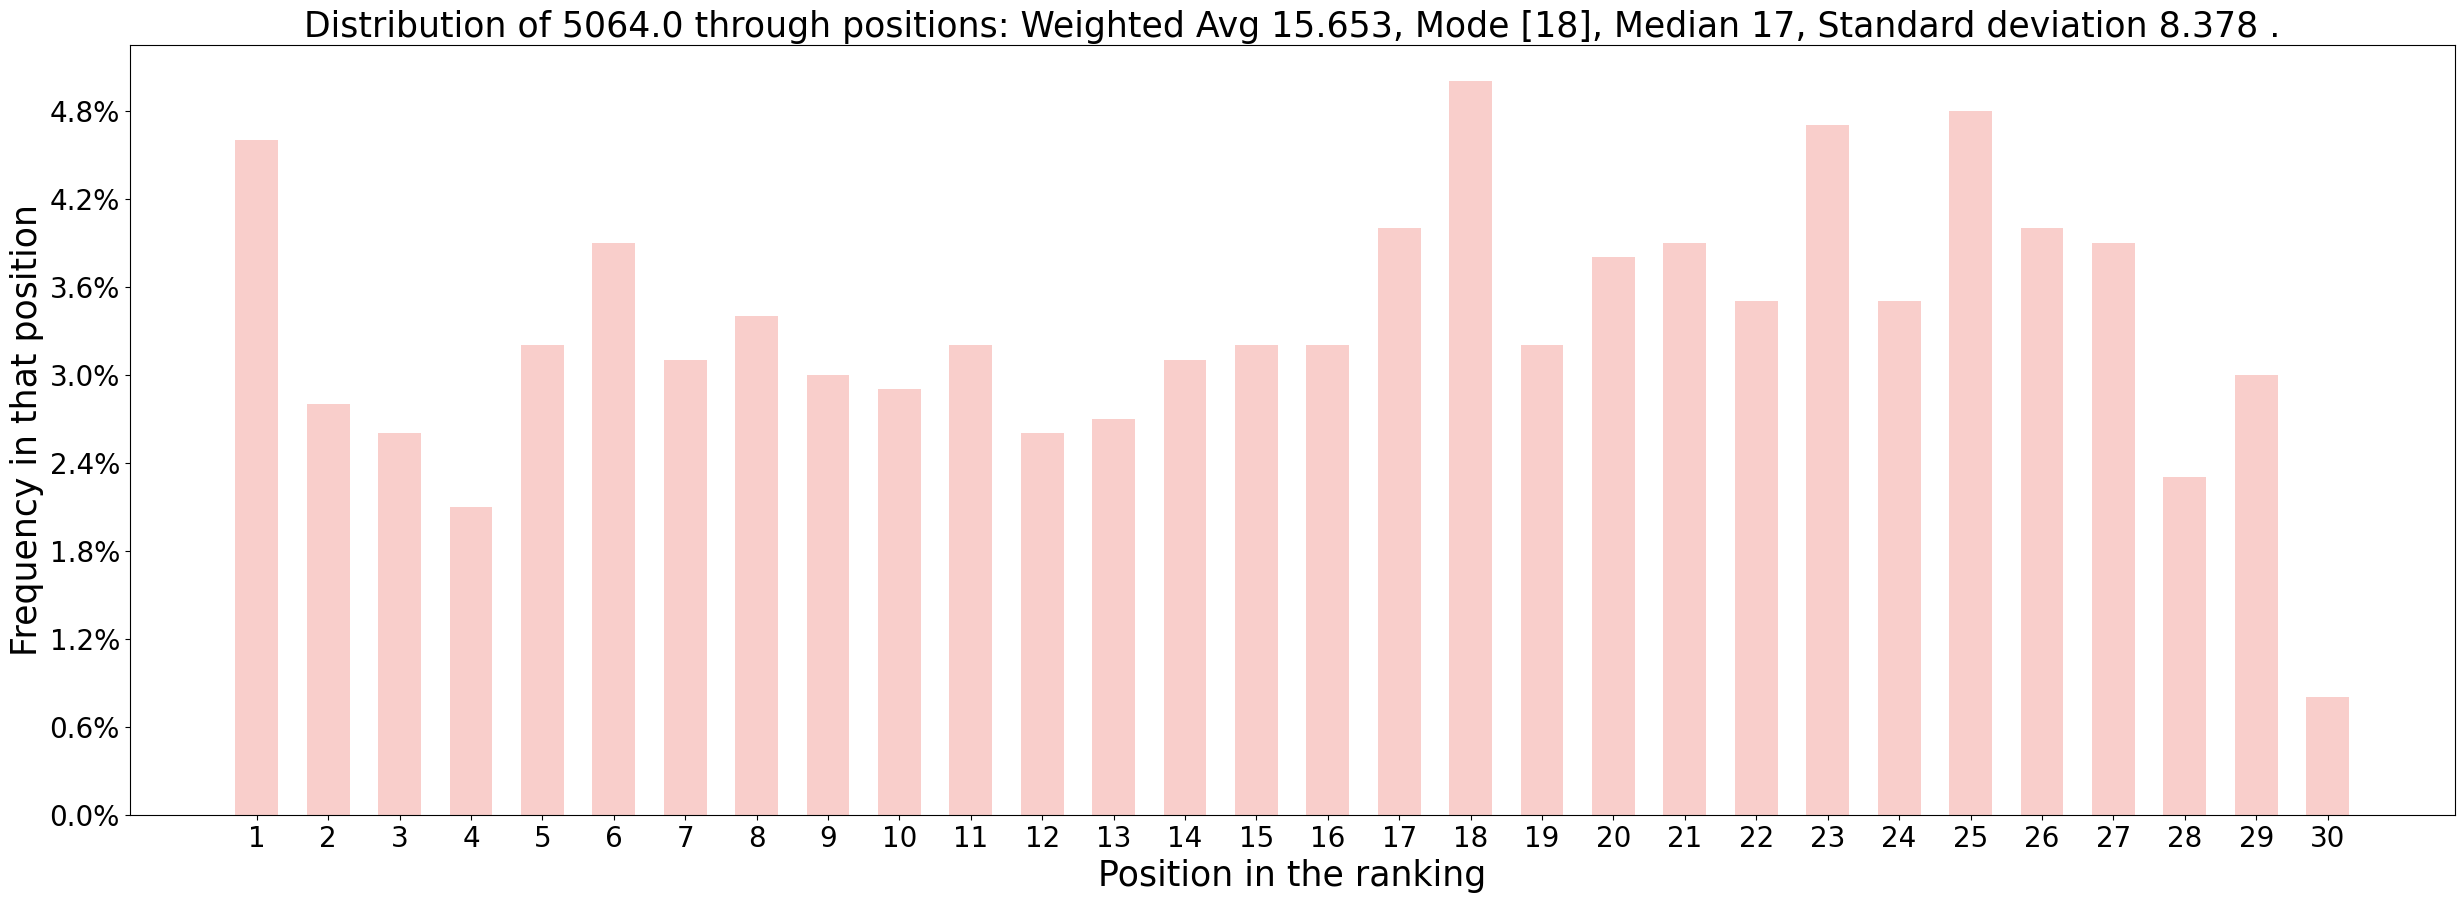

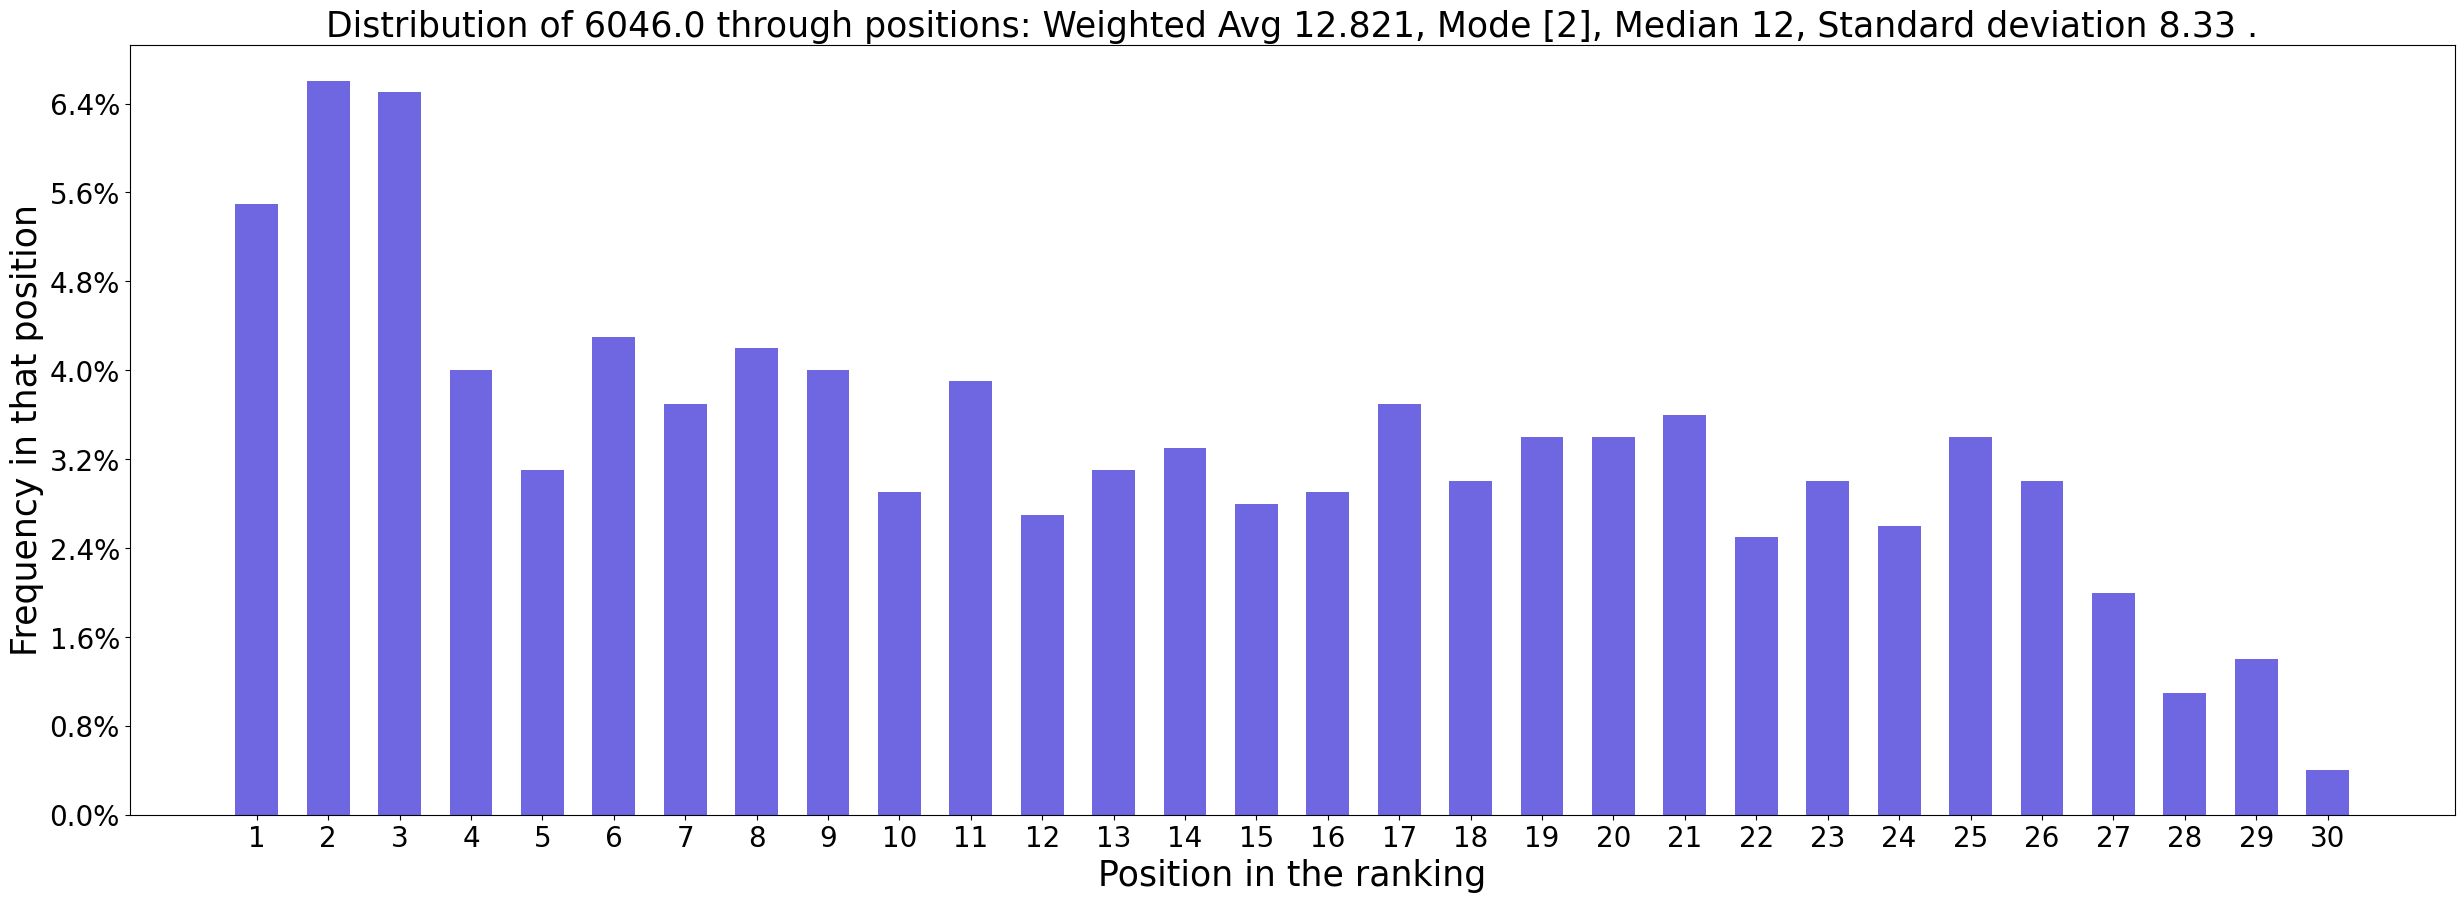

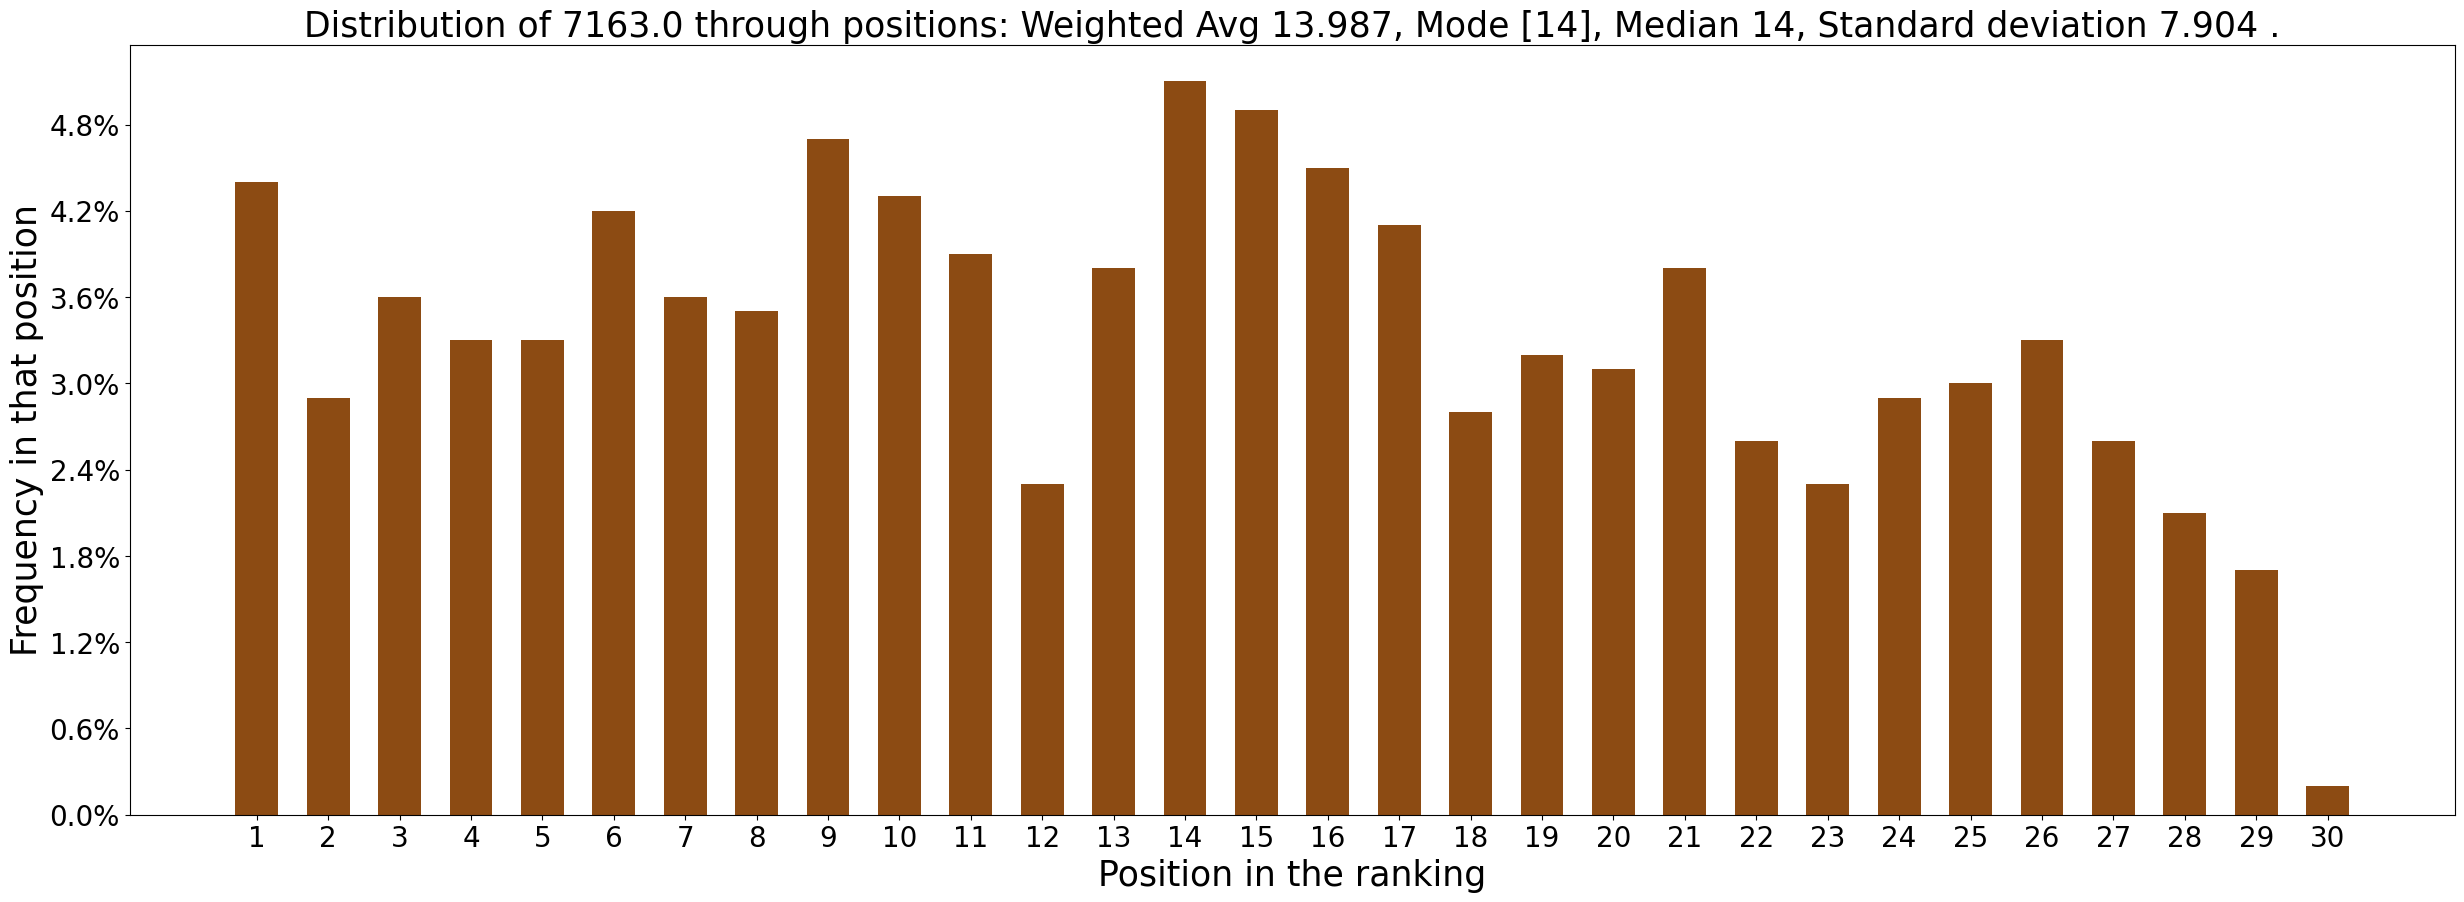

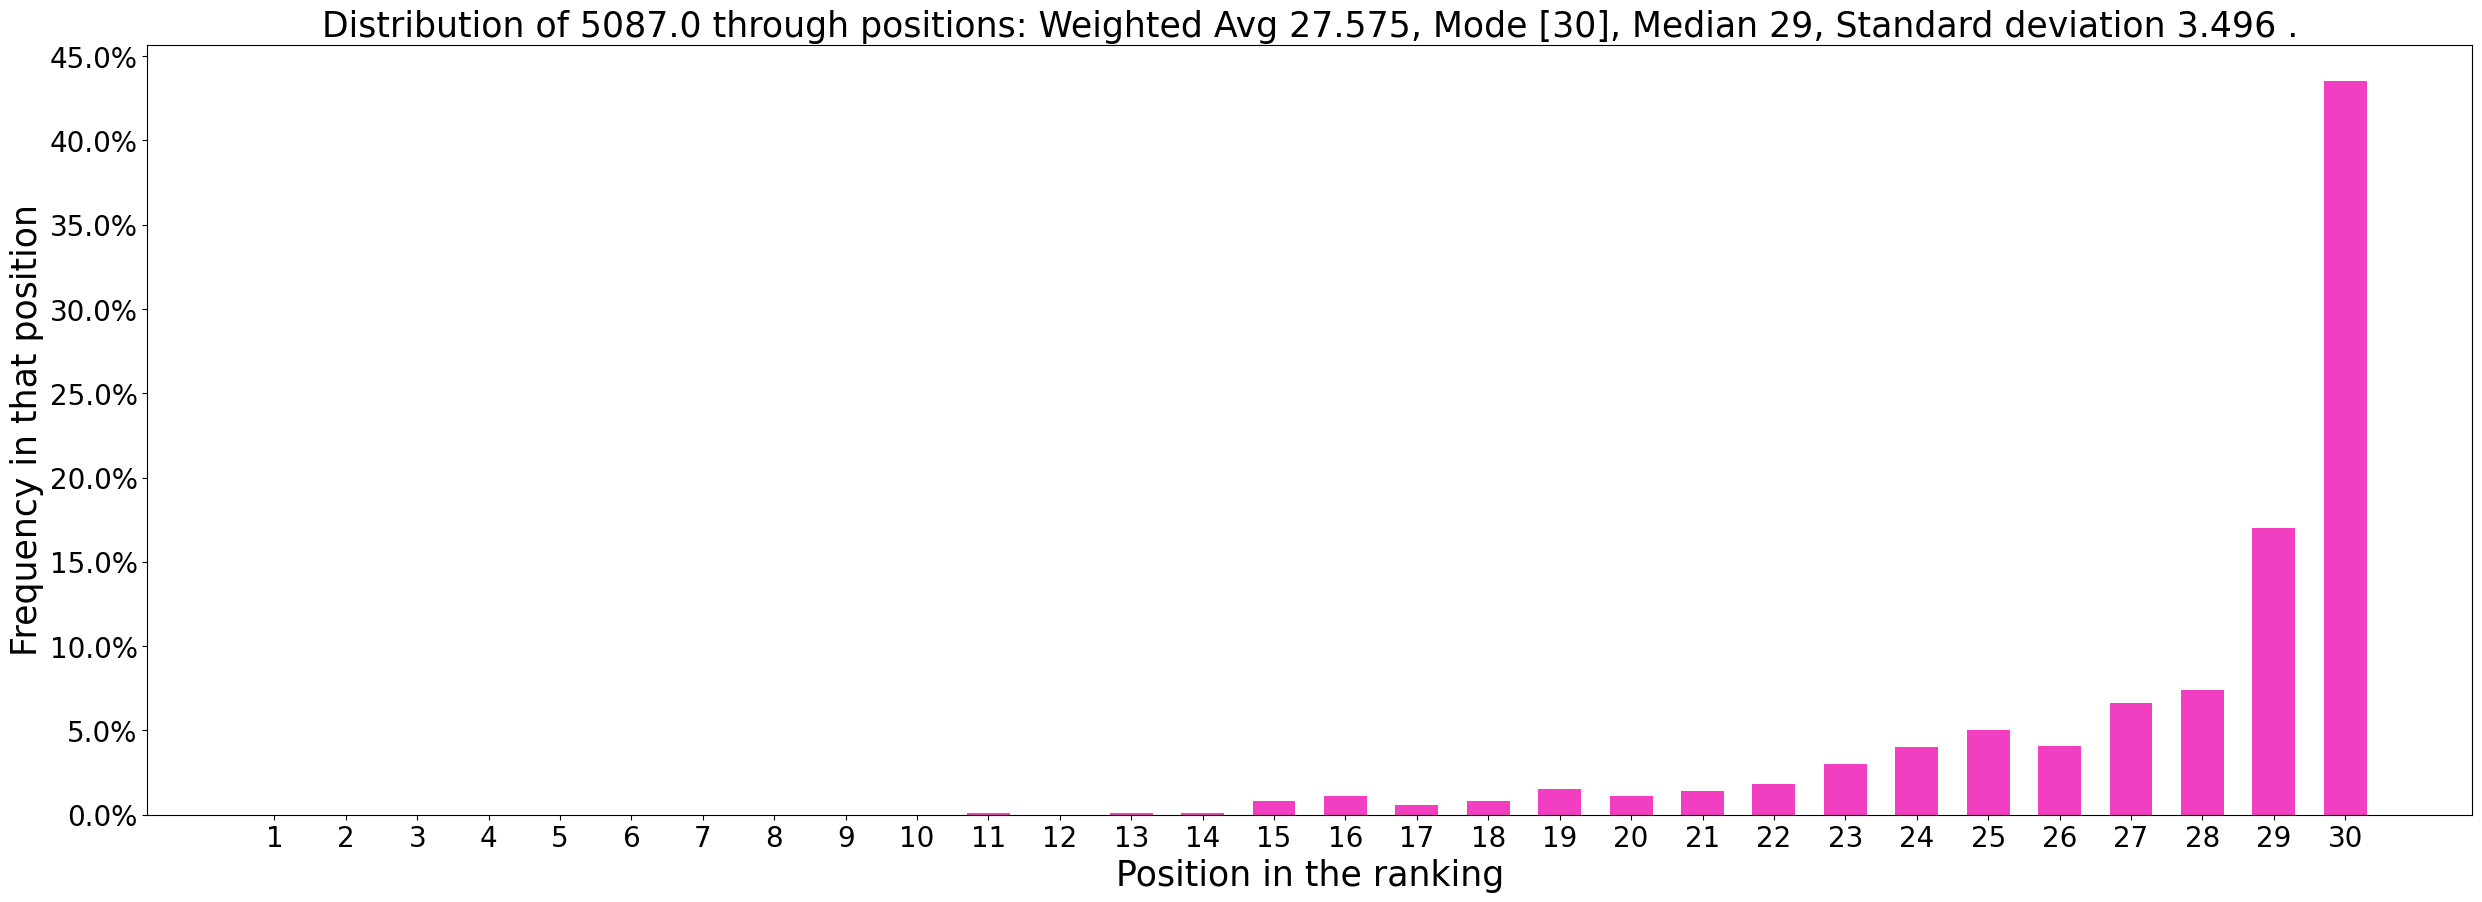

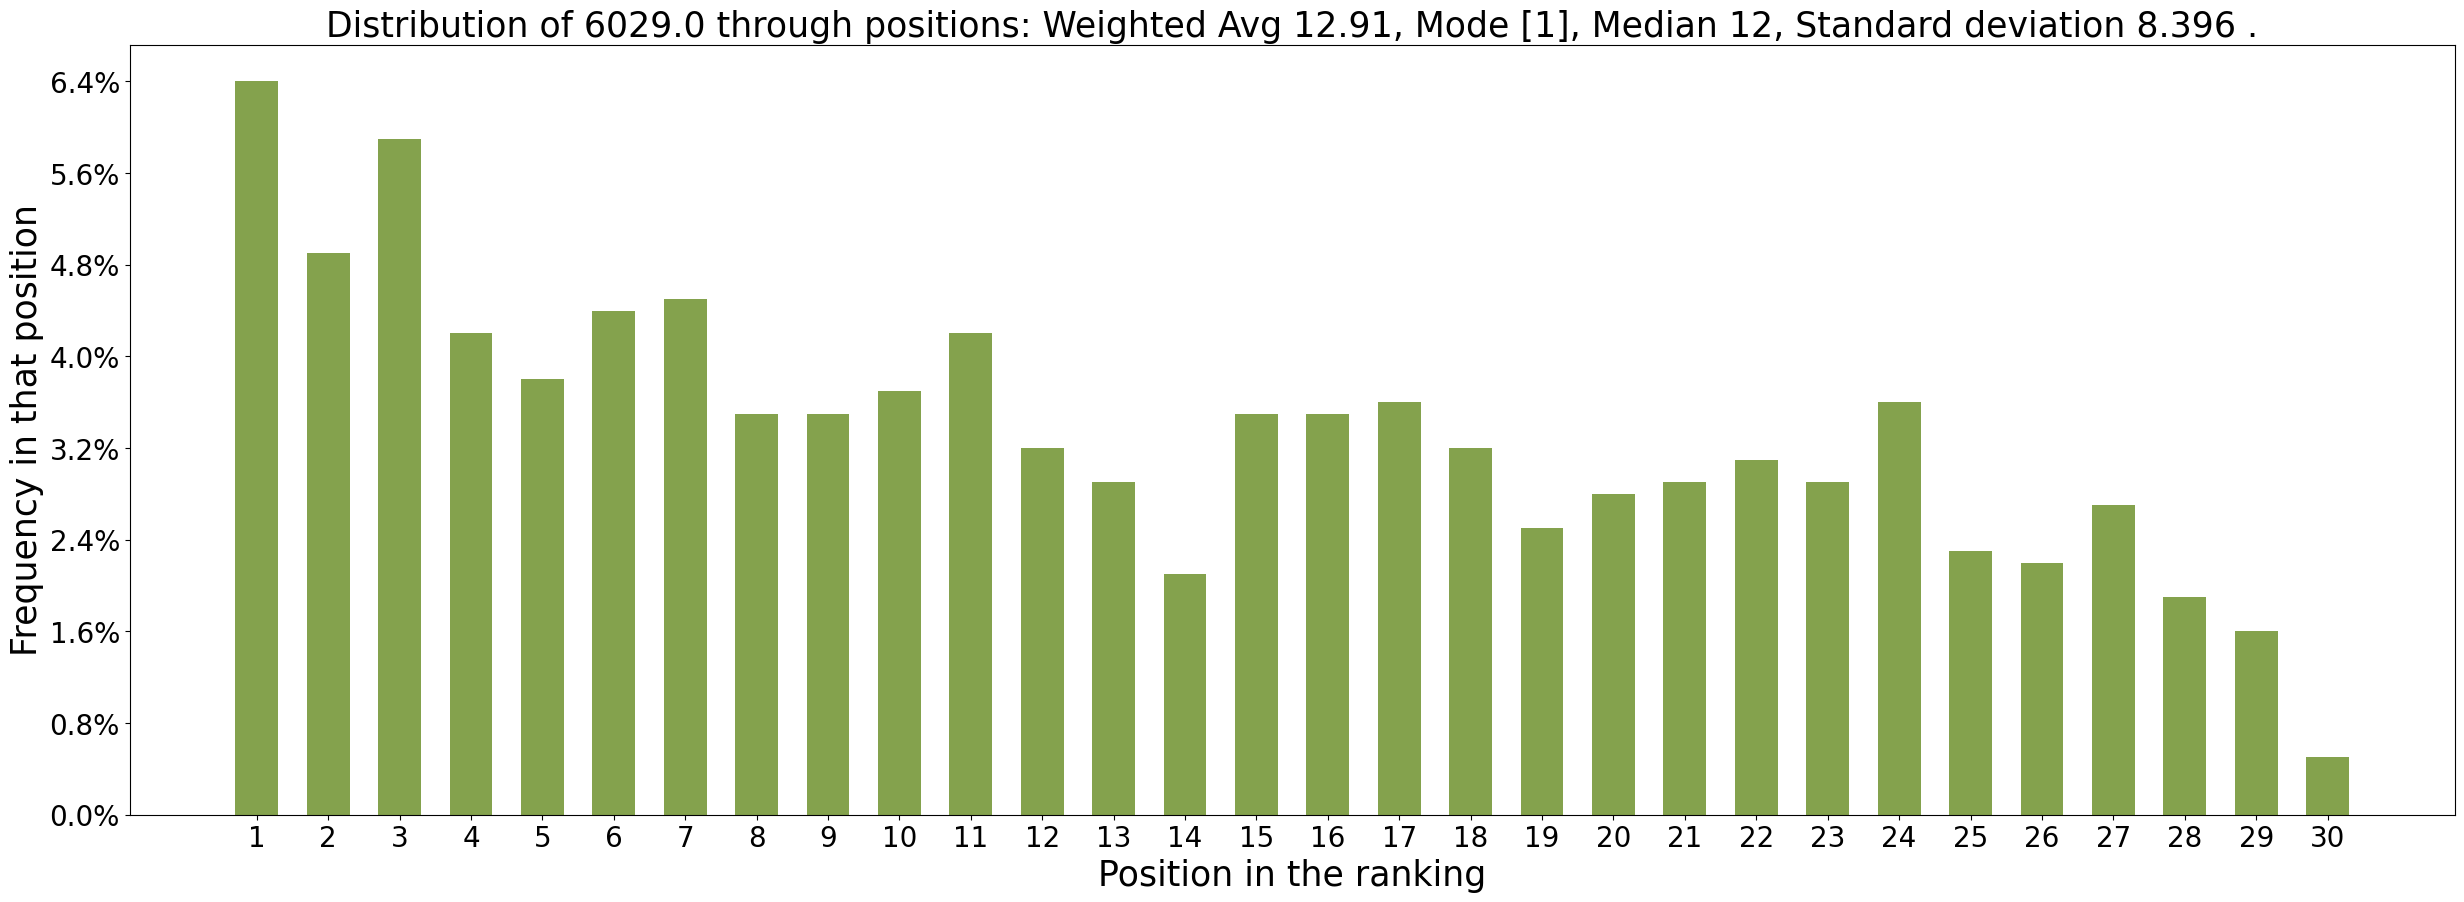

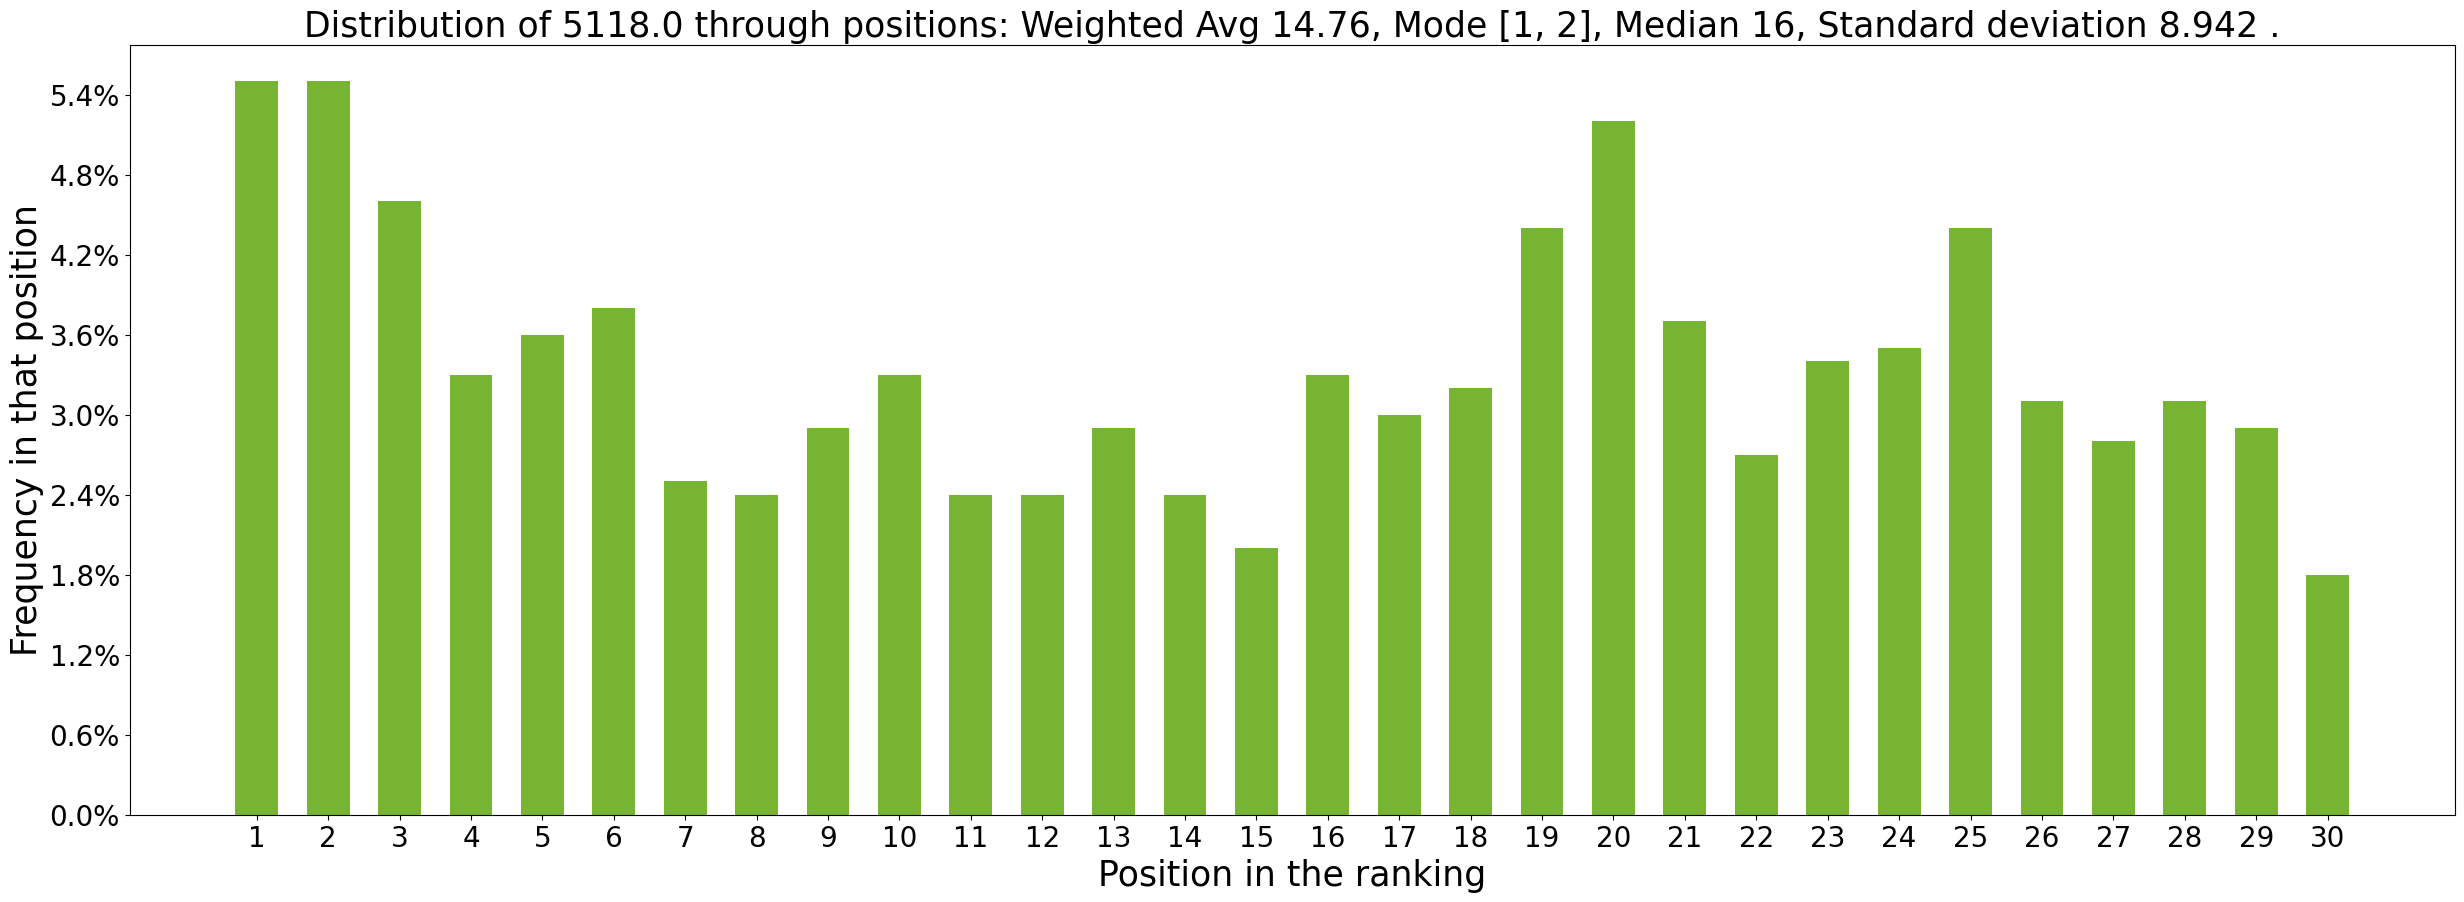

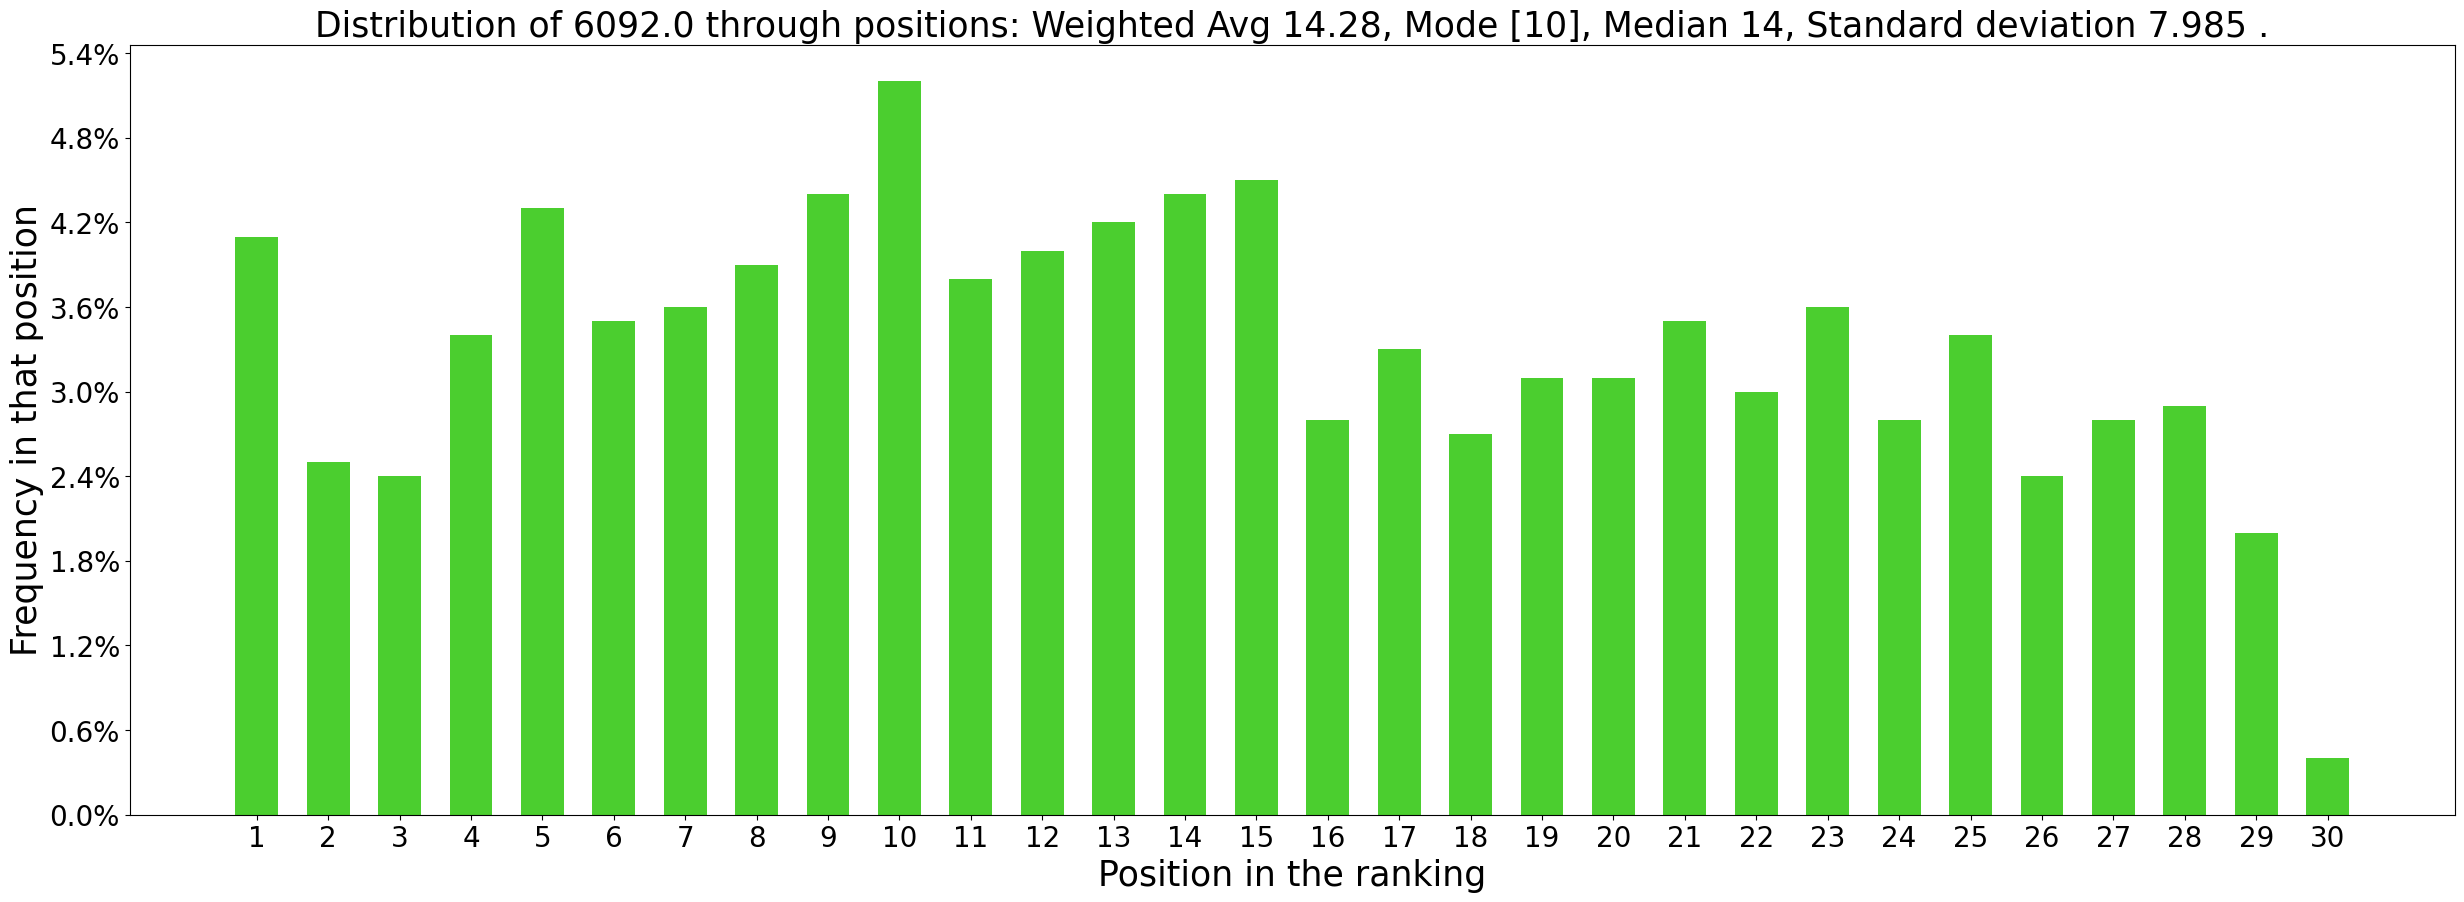

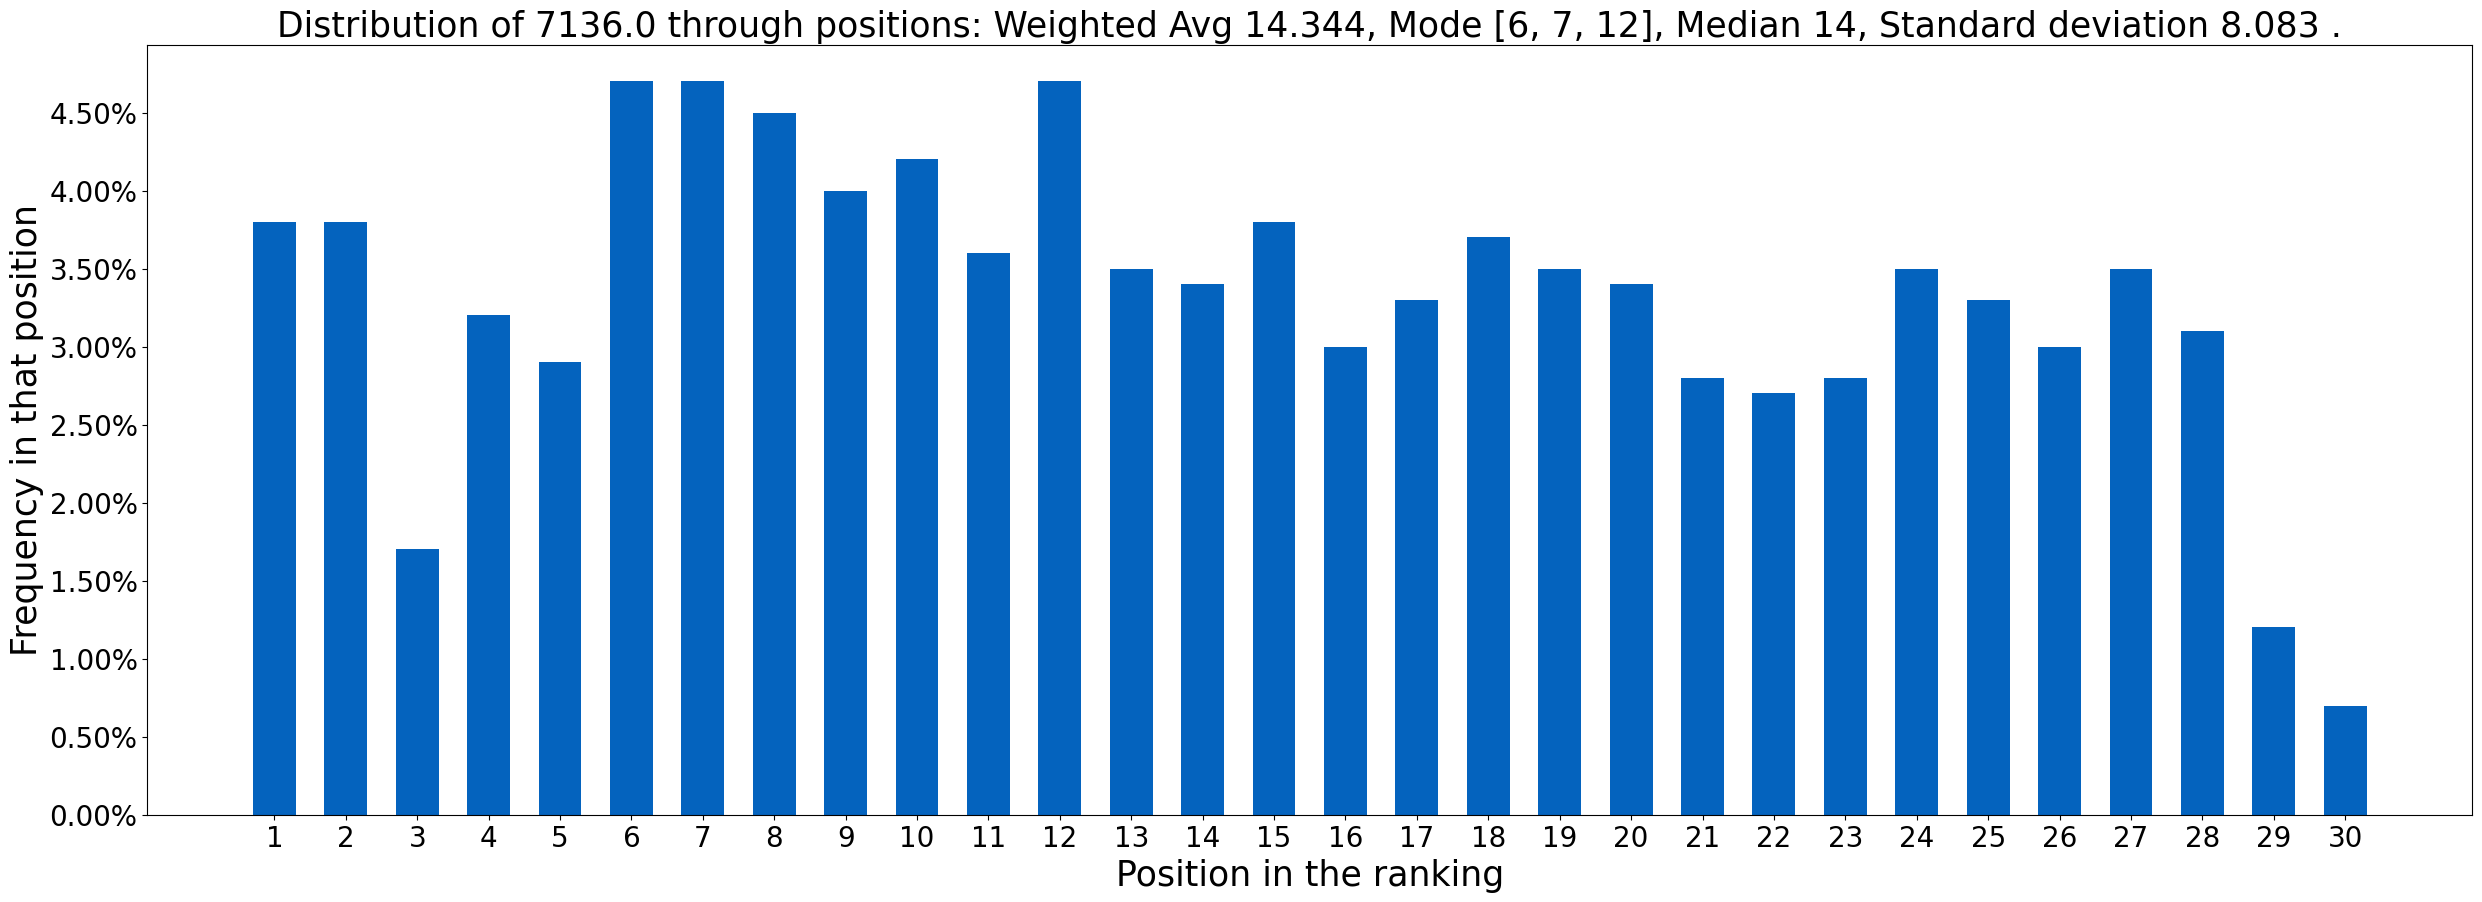

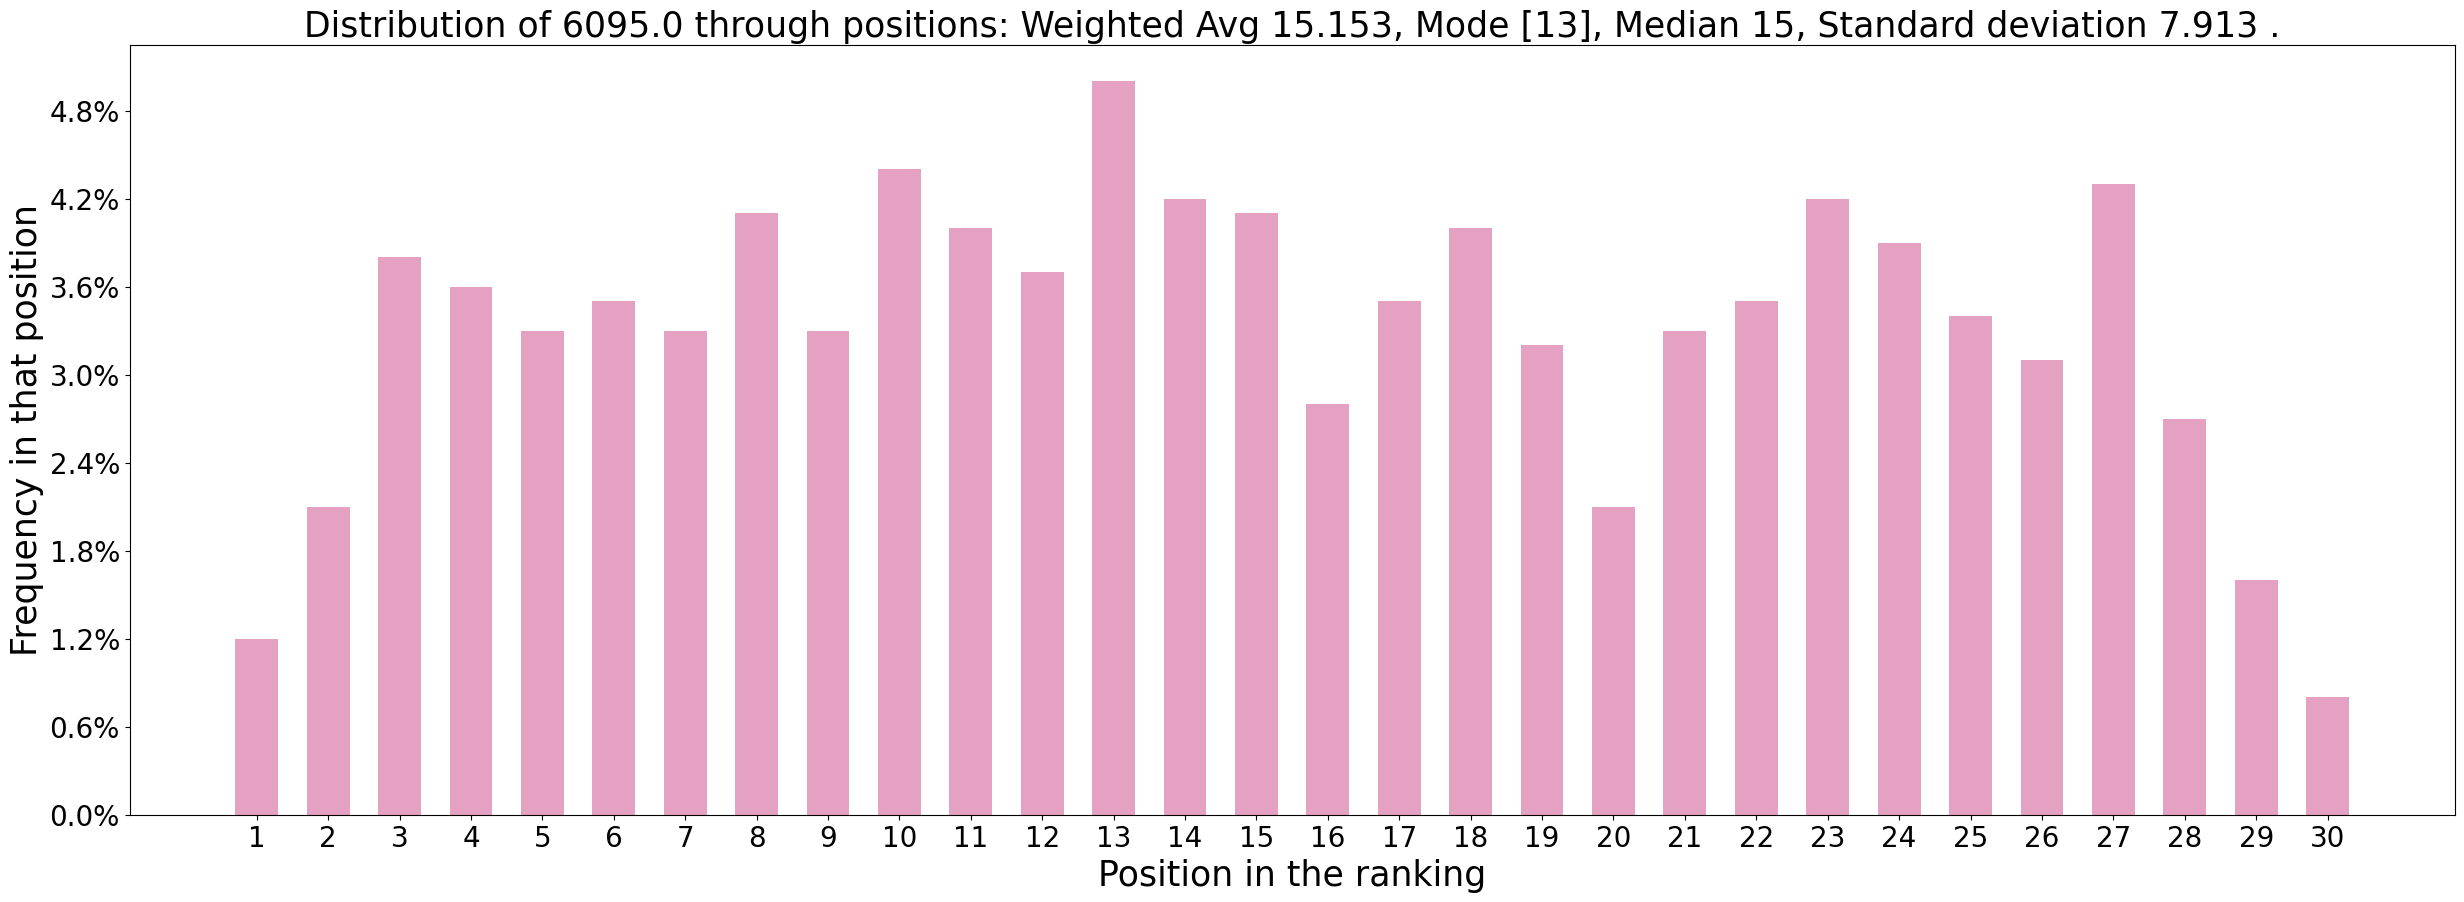

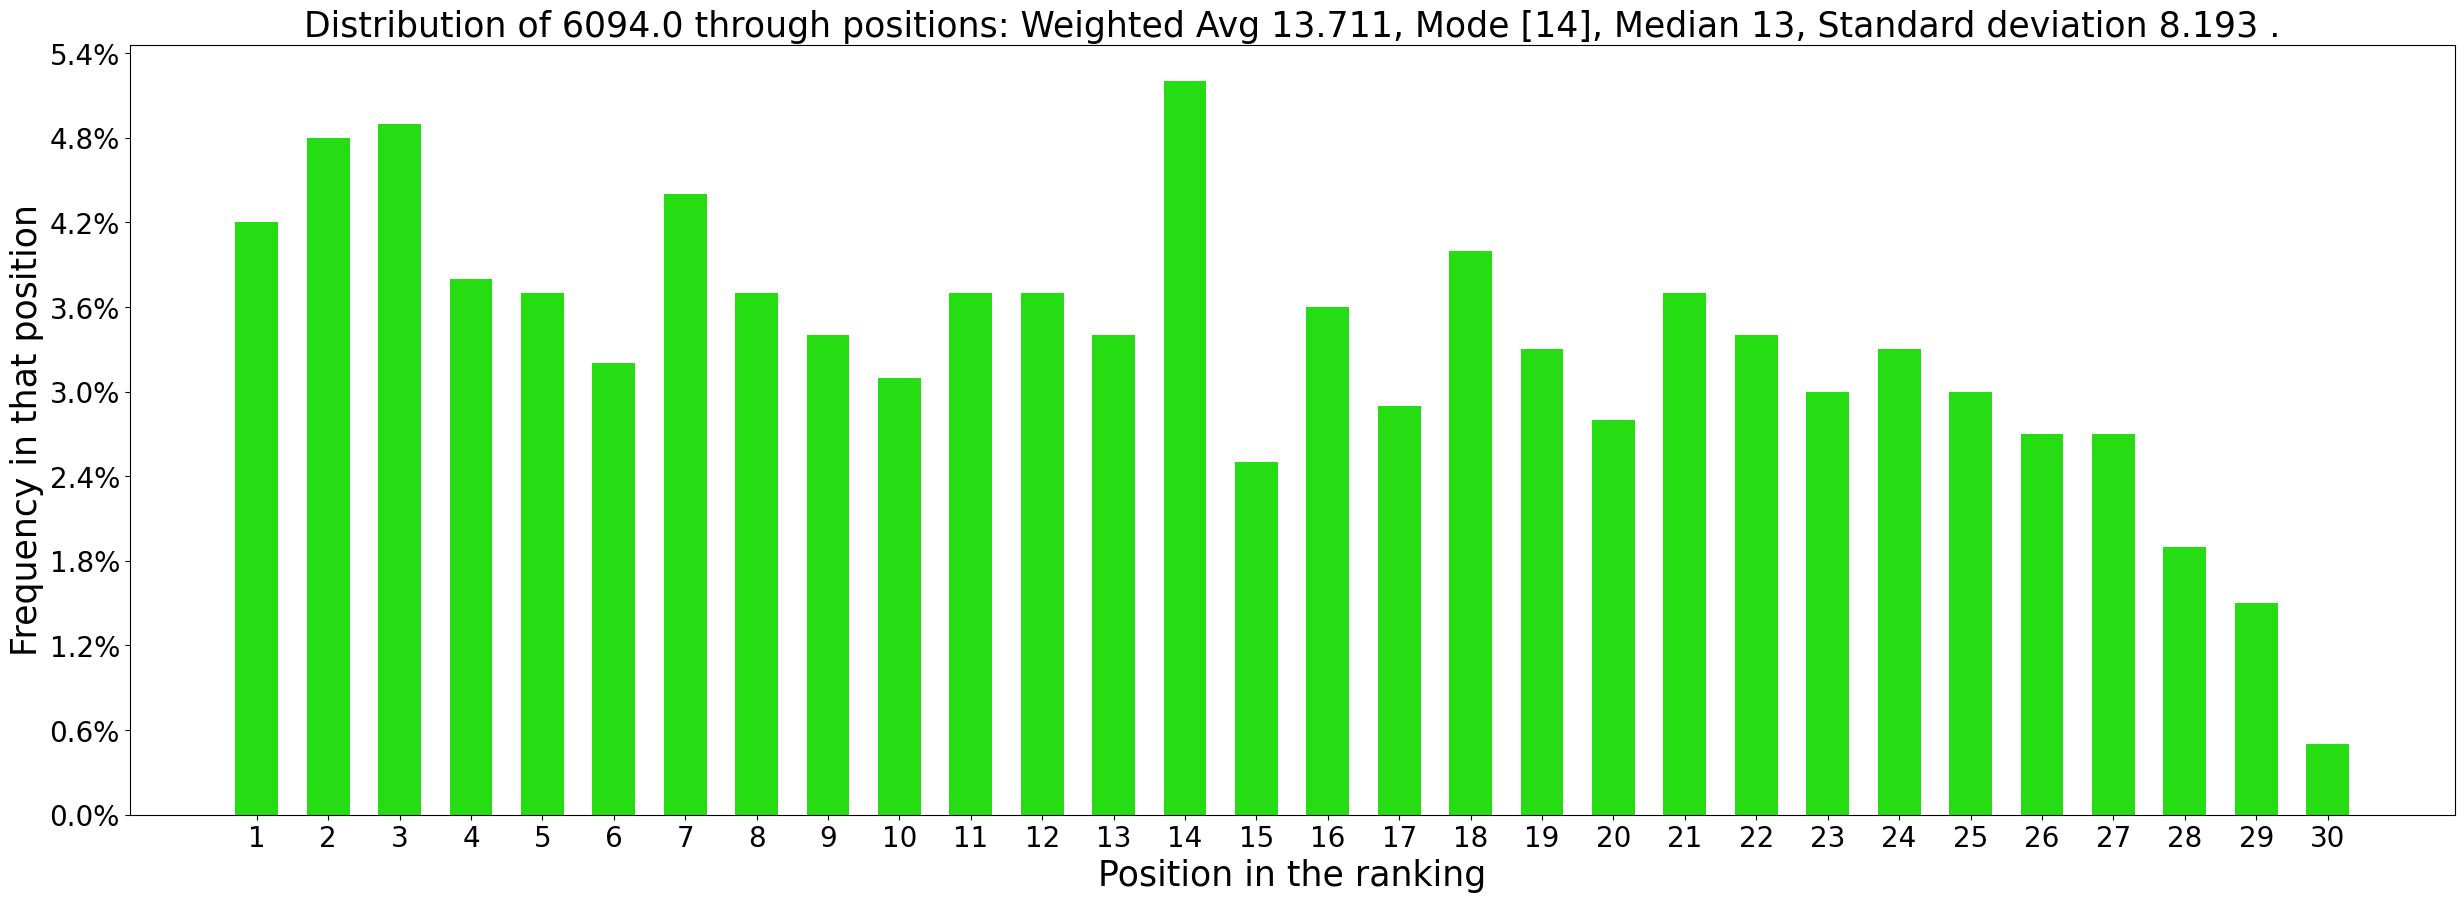

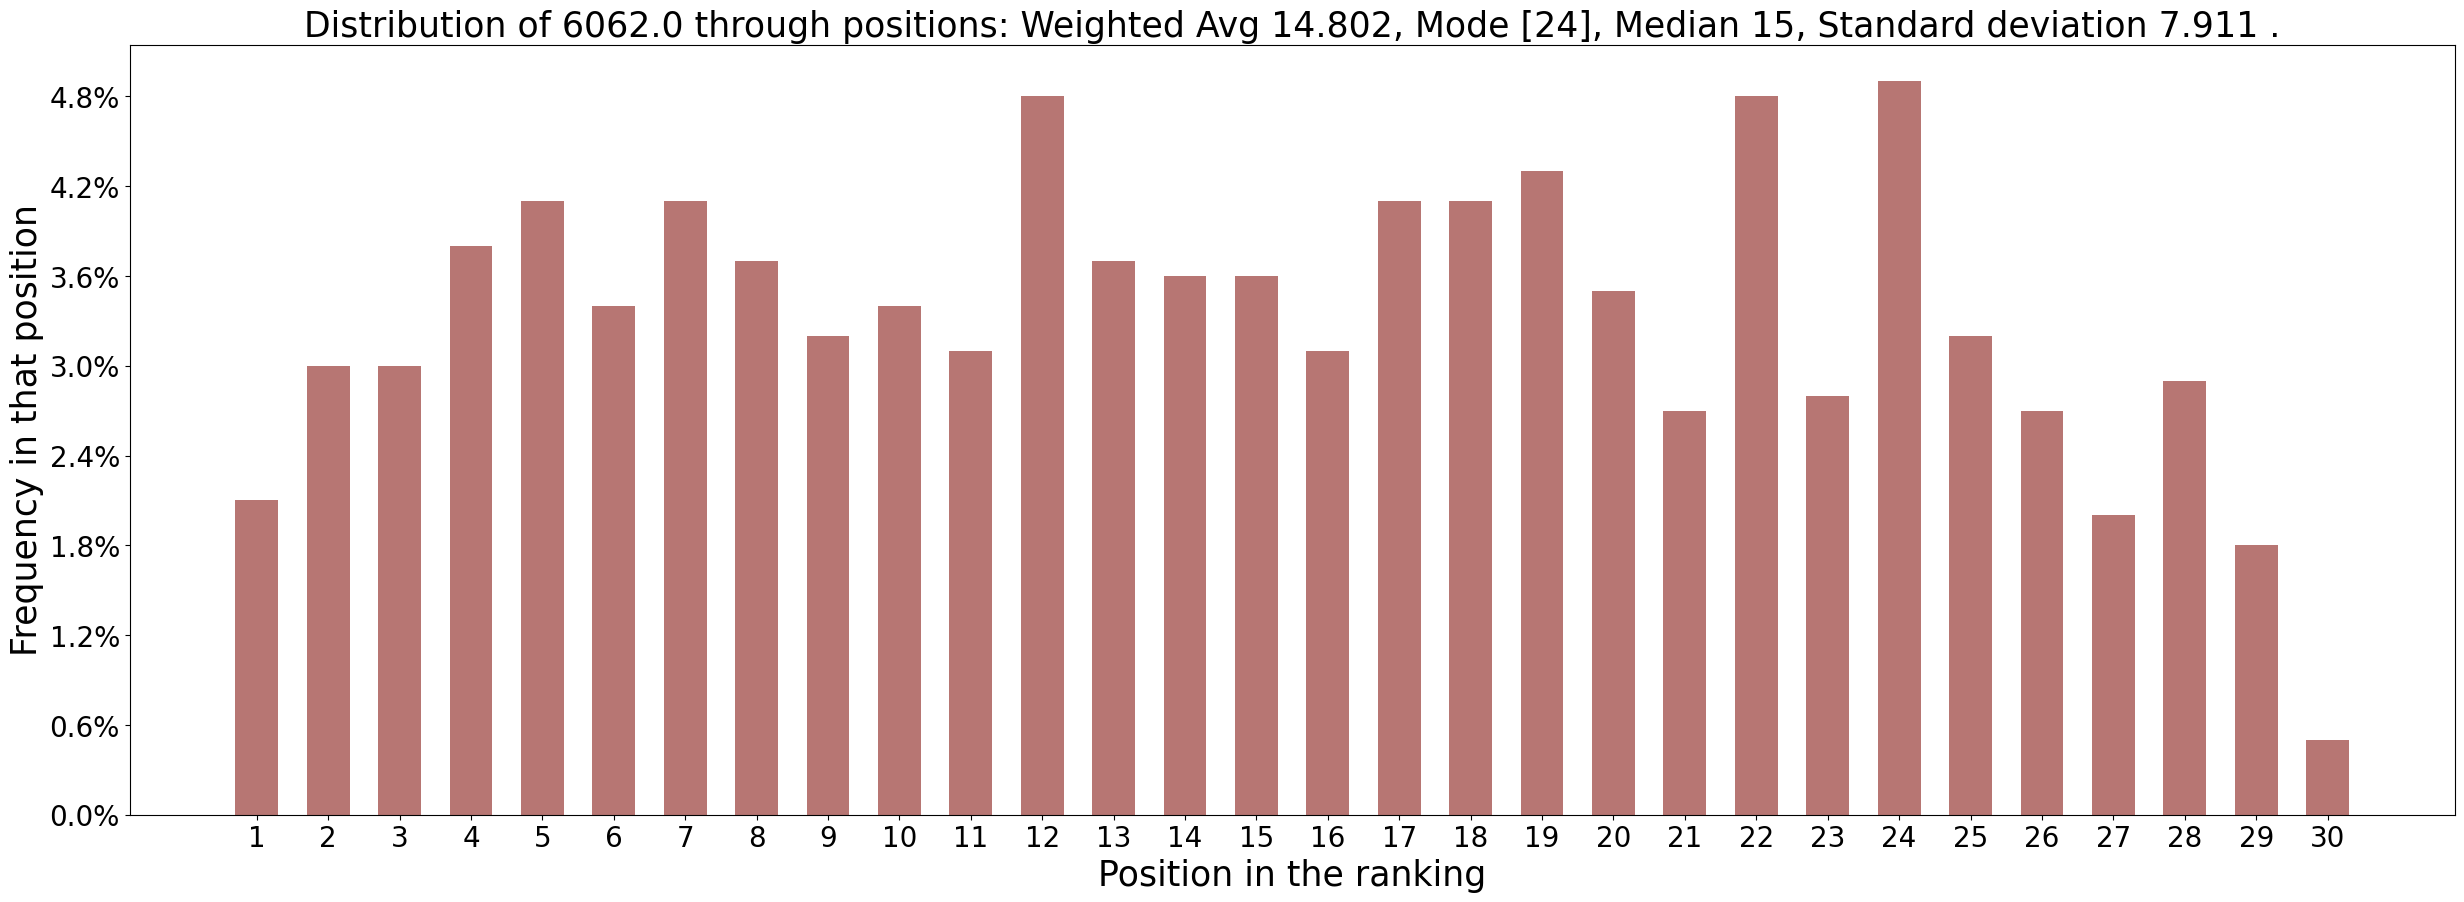

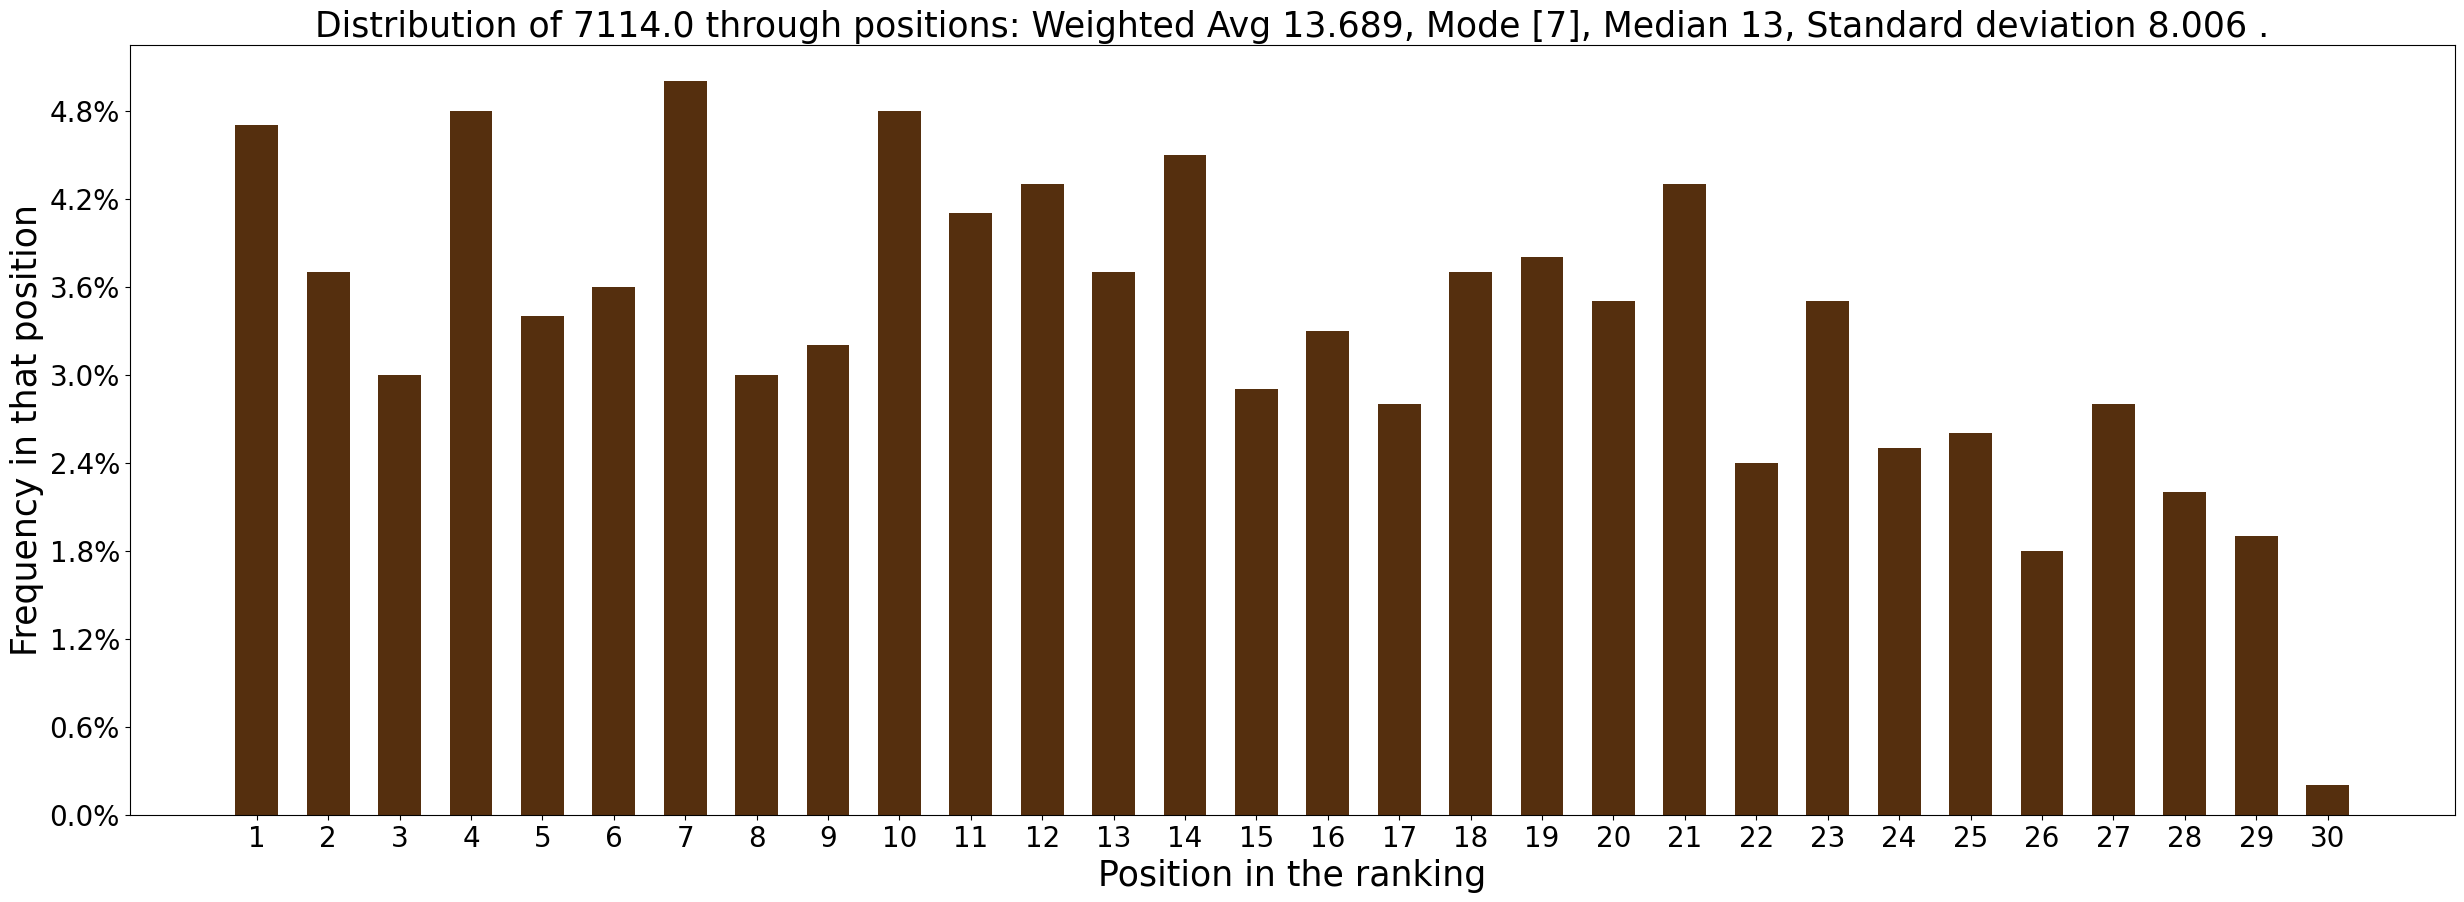

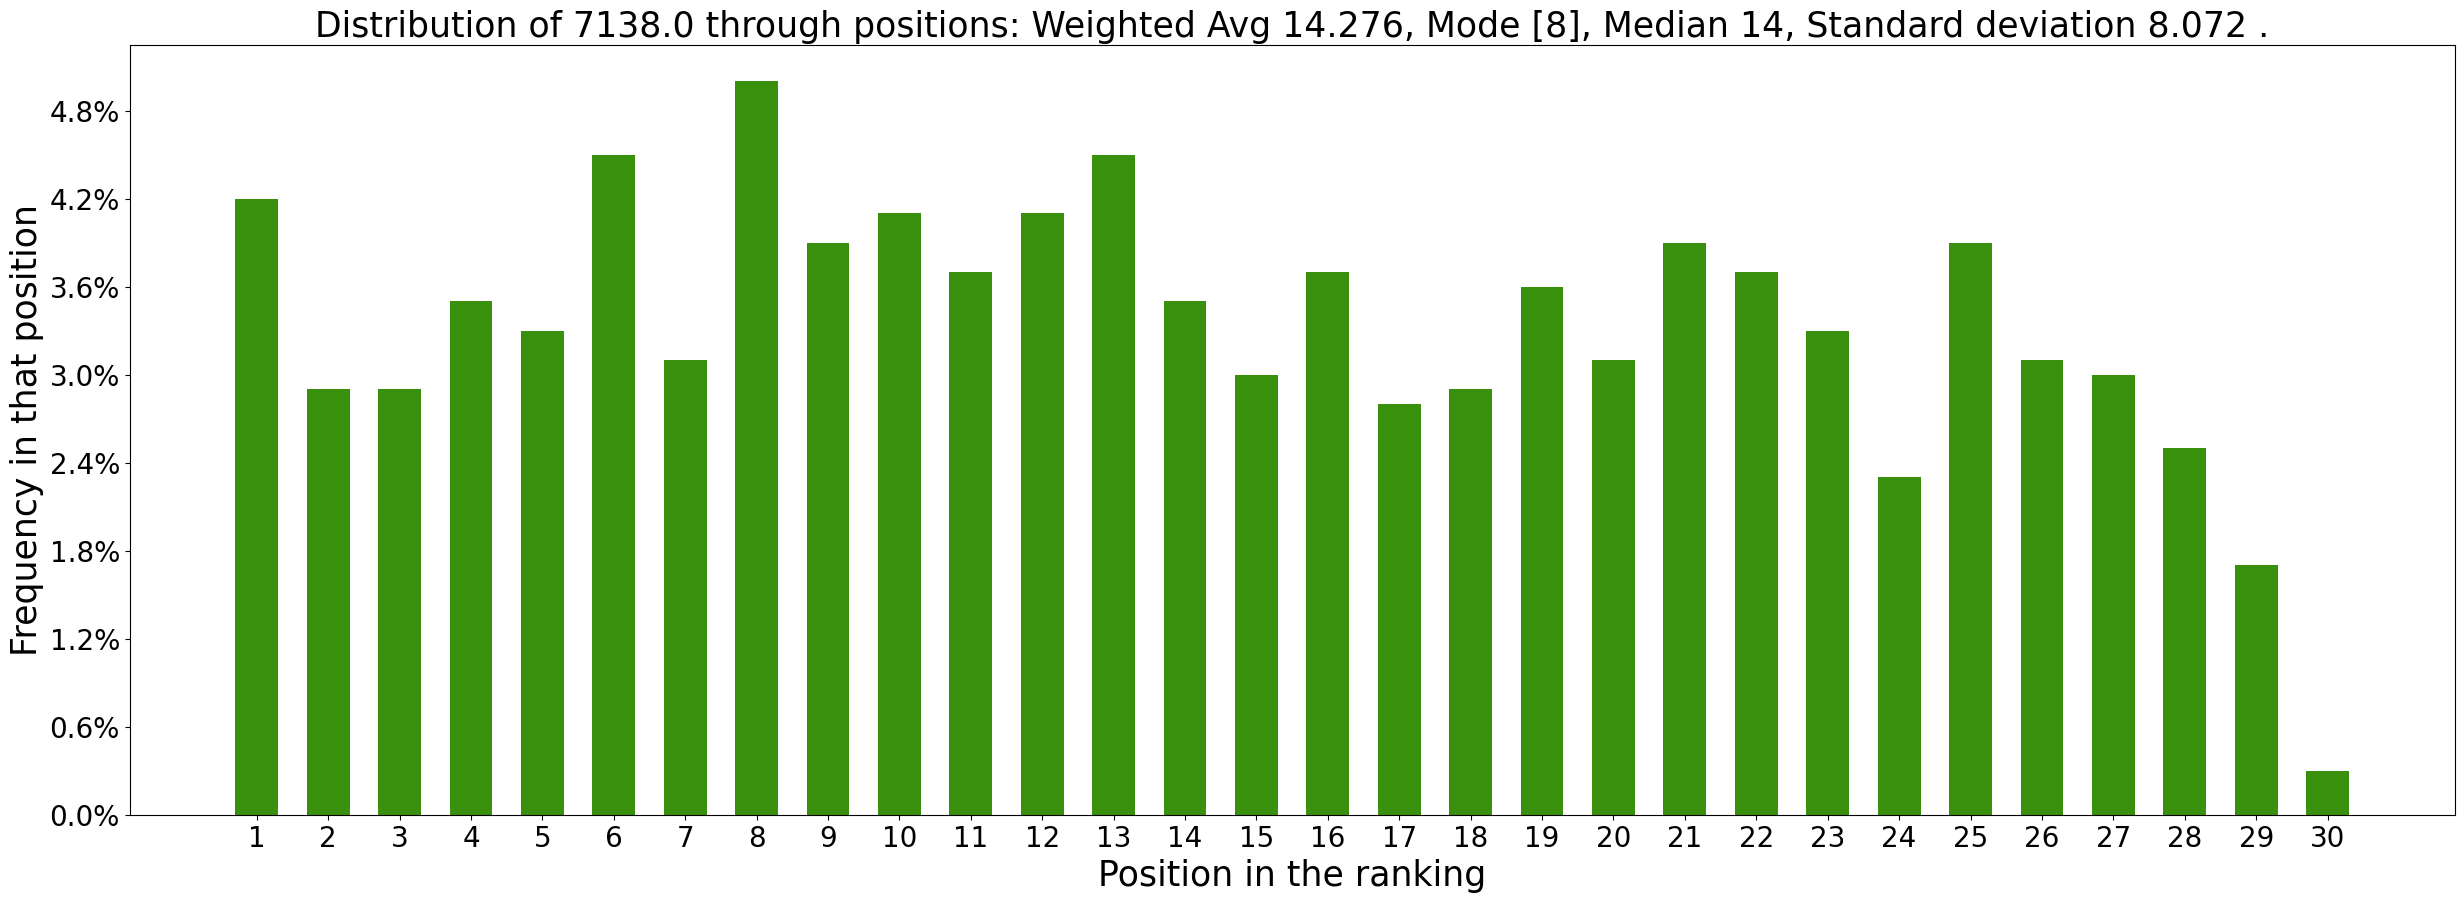

In [30]:
import os
import matplotlib.ticker as mtick
#Plotting results
output_directory = r'C:\Users\varin\PycharmProjects\amazon-lameness-phase2\rank_algorithm\Mergesort\Results'

x=list(range(1,num_cows+1))
avg=[]
median=[]
mode=[]
std_dev=[]
for i in range(num_cows):
    y=individual_counts[new_cow_order[i]]

    #Mean
    # Compute the weighted sum of positions
    weighted_sum = sum((i+1) * count for i, count in enumerate(y))
    # Compute the average position
    avg.append(weighted_sum / num_ranks)
    #Mode
    # Find the maximum occurrence count
    max_count = max(y)
    # Find all the positions with the maximum occurrence count
    mode.append([h+1 for h, count in enumerate(y) if count == max_count])
    #Median
    # Compute the cumulative counts
    cumulative_counts = [sum(y[:i+1]) for i in range(len(y))]
    # Find the position at which the cumulative count exceeds or reaches half of the total count
    median.append(next(i+1 for i, count in enumerate(cumulative_counts) if count>= num_ranks / 2))

    # Calculate the standard deviation
    differences = sum(y[j] * ((j + 1) - avg[i]) ** 2 for j in range(len(y)))
    std_deviation = math.sqrt(differences / (num_ranks))

    #Calculate the standard deviation
    std_dev.append(round(std_deviation, 3))

    plt.figure(figsize=(30, 10))
    color = (random.random(), random.random(), random.random())
    y_prob = [i / num_ranks for i in y]
    plt.bar(x, y_prob, color=color, width=0.6)
    plt.gca().yaxis.set_major_formatter(mtick.PercentFormatter(xmax=1.0))
    # Limit the number of tick points on the y-axis

    plt.gca().yaxis.set_major_locator(mtick.MaxNLocator(nbins=10))
    plt.xlabel('Position in the ranking', fontsize=25)
    plt.ylabel('Frequency in that position', fontsize=25)
    plt.title(f'Distribution of {new_cow_order[i]} through positions: Weighted Avg {avg[i]}, Mode {mode[i]}, Median {median[i]}, Standard deviation {std_dev[i]} .', fontsize=25)
    plt.xticks(x, fontsize=20)
    plt.yticks(fontsize=20)
    # Generate the complete file path
    filepath = os.path.join(output_directory, f'{new_cow_order[i]}.png')
    # Save the figure with dynamic filename and specified directory
    plt.savefig(filepath)
    plt.show()
